In [91]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import wcs
from astropy.table import Table, join
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

In [92]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'15'}

In [93]:
13.8*0.05

0.6900000000000001

In [94]:
dn=['W3OH','OMC1','NGC2024','MonR2','DR21','S140']

dt=[[],[],[],[],[],[]]

for i in range(len(dn)):
    dt[i].append(ascii.read('../../DR21/'+dn[i]+'_sedfit_interative.dat'))
#dt=ascii.read('../../DR21/'+dn[0]+'_sedfit.dat')

for i in range(len(dn)):
    df=fits.open('../../'+dn[i]+'/'+dn[i]+'_hs500.fits')
    dh=df[0].header
    dd=df[0].data
    fits.writeto(dn[i]+'_colden.fits',np.reshape(dt[i][0]['NH2'],np.shape(dd)),dh,overwrite='True')
    #fits.writeto(dn[i]+'_dcolden.fits',np.reshape(dt[i][0]['dNH2'],np.shape(dd)),dh,overwrite='True')

In [95]:
ra_hs=[]
dec_hs=[]
dd_hs=[]


for i in range(len(dn)):

    df_500=fits.open(dn[i]+'_colden.fits')
    dh_500=df_500[0].header
    dd_500=df_500[0].data
    dw_500=wcs.WCS(dh_500)

    ra_500,dec_500=np.zeros((dh_500['NAXIS2'],dh_500['NAXIS1'])),np.zeros((dh_500['NAXIS2'], dh_500['NAXIS1']))
    for ri in range(dh_500['NAXIS1']):
        for di in range(dh_500['NAXIS2']):
            ra_500[di, ri], dec_500[di, ri] = dw_500.wcs_pix2world(ri+1, di+1, 1)[:2]
            
    ra_hs.append(ra_500)
    dec_hs.append(dec_500)
    dd_hs.append(dd_500)

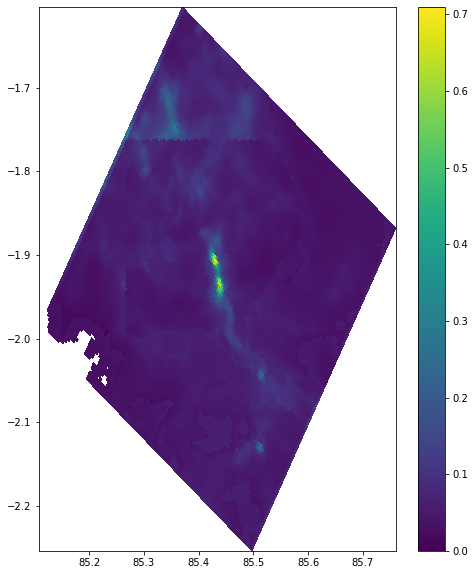

In [96]:
plt.figure(figsize=(8,10))
plt.pcolor(ra_hs[2],dec_hs[2],dd_hs[2])
plt.colorbar()
#plt.title(r'500 $\mu$m')
#plt.xlim(309.8576750380012-1./60.,309.6049366121149+1./60.)
#plt.ylim(42.26744573959564+1./60.,42.476679792294426-1./60.)
#plt.savefig(na+'_500mu.png',format='png',dpi=200)
plt.show()

## CN mom0

In [97]:
ra_cn=[]
dec_cn=[]
dd_cn=[]
dh_cn=[]

for i in range(len(dn)):
    dn_cn=dn[i]+'_CN2_6thline_mom0'
    df_cn=fits.open(dn_cn+'.fits')
    dh_cn2=df_cn[0].header
    dd_cn2=df_cn[0].data
    dw_cn=wcs.WCS(dh_cn2)
    ra_cn2, dec_cn2 = np.zeros((dh_cn2['NAXIS2'], dh_cn2['NAXIS1'])), np.zeros((dh_cn2['NAXIS2'], dh_cn2['NAXIS1']))
    for ri in range(dh_cn2['NAXIS1']):
        for di in range(dh_cn2['NAXIS2']):
            ra_cn2[di, ri], dec_cn2[di, ri] = dw_cn.wcs_pix2world(ri+1, di+1,1)[:2]
            
    ra_cn.append(ra_cn2)
    dec_cn.append(dec_cn2)
    dd_cn.append(dd_cn2)
    dh_cn.append(dh_cn2)

<ipython-input-98-4b979d1da033>:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[0],dec_cn[0],dd_cn[0])


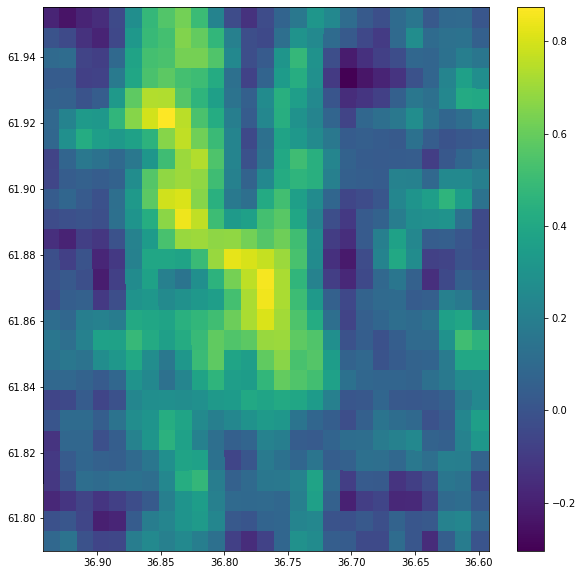

In [98]:
plt.figure(figsize=(10,10))
plt.pcolor(ra_cn[0],dec_cn[0],dd_cn[0])
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

#n_bg=np.where((ra_cn<309.71)&(dec_cn>42.39))
#print(np.mean(dd_cn[n_bg]))
#print(dd_cn[n_bg])

In [99]:
k=1.38*10**(-16) # boltzmann constant
h=6.63*10**(-27) 
B0=56693.47*10**6 
gj=2.
s=1./4.
Eu=5.44810 # https://www.splatalogue.online/displayadvancedresults.php?submit=submit
Tex=[7.7,37.3,9.6,8.0,6.2,20.7]
Qrot=0.37*(np.array(Tex)+0.12) # kt/hB0 +1/3
mu=1.45*10**(-18)
Ri=8./279.
nu00=113.49964*10**9

N_cn_2=[[],[],[],[],[],[]]
N_cn2_2=[]
#N_n2=[]

for i in range(len(dn)):
    N=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot[i]/gj)*np.exp(Eu/Tex[i])*Tex[i]/(Tex[i]-2.7)*dd_cn[i].flatten()*100000. ## Tex-2.7; background temp
    N_cn_2[i].append(N)
    N=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot[i]/gj)*np.exp(Eu/Tex[i])*Tex[i]/(Tex[i]-2.7)*dd_cn[i]*100000. ## Tex-2.7; background temp
    N_cn2_2.append(N)
    
    #N2=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot/gj)*np.exp(Eu/Tex)*Tex/(Tex-2.7)*dd_cn.flatten()[i]*100000./(4*10**(-9))
    #N_n2.append(N2)
    
print(np.shape(N_cn_2))



(6, 1)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [100]:
#plt.figure()
#plt.pcolor(ra_cn[0],dec_cn[0],N_cn2[0]/N_cn2_2[0])
#plt.colorbar()
#plt.show()

In [101]:
print(h*B0*1./2.*3./2./k)

print(k/h/B0)
print(0.36*1/3.)

sig_cn2=[0.13,0.27,0.31,0.14,0.31,0.16]

dcn2=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot[i]/gj)*\
np.exp(Eu/Tex[i])*Tex[i]/(Tex[i]-2.7)*dd_cn[i]*100000. ## Tex-2.7; background temp

2.042813620108696
0.36714068900720037
0.12


In [102]:
#dt_cn=[]

#for i in range(len(dn)):
#    dt_cn.append(Table([ra_cn[i].flatten(),dec_cn[i].flatten(),N_cn[i][0]],names=['ra','dec','NCN']))

In [103]:
from reproject import reproject_interp

df_500=[]
df_500_d=[]
for i in range(len(dn)):
    df_500.append(fits.open(dn[i]+'_temp.fits'))
    df_500_d.append(fits.open(dn[i]+'_dtemp.fits'))
for i in range(len(dn)):
    array,footprint=reproject_interp(df_500[i],dh_cn[i])
    array2,footprint2=reproject_interp(df_500_d[i],dh_cn[i])
    fits.writeto(dn[i]+'_temp_reproject_to_cncolden.fits',array,dh_cn[i],overwrite=True)
    fits.writeto(dn[i]+'_dtemp_reproject_to_cncolden.fits',array2,dh_cn[i],overwrite=True)

In [104]:
N_cn=[[],[],[],[],[],[]]
N_cn2=[]
#N_n2=[]

for i in range(len(dn)):
    df_500=fits.open(dn[i]+'_temp_reproject_to_cncolden.fits')[0].data
    print(min(df_500[np.where(~np.isnan(df_500))]))
    N=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot[i]/gj)*np.exp(Eu/df_500.flatten())*df_500.flatten()/(df_500.flatten()-2.7)*dd_cn[i].flatten()*100000. ## Tex-2.7; background temp
    N_cn[i].append(N)
    N=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(Qrot[i]/gj)*np.exp(Eu/df_500)*df_500/(df_500-2.7)*dd_cn[i]*100000. ## Tex-2.7; background temp
    N_cn2.append(N)

11.862577840923262
10.000001407636258
12.375167158879687
11.643706390251317
12.361745924107531
10.000024791720111


In [105]:
dt_cn=[]

for i in range(len(dn)):
    dt_cn.append(Table([ra_cn[i].flatten(),dec_cn[i].flatten(),N_cn[i][0]],names=['ra','dec','NCN']))

In [106]:
ra_rep=[]
dec_rep=[]
dd_rep=[]

for i in range(len(dn)):

    df_500=fits.open(dn[i]+'_n2colden_reproject_to_cncolden.fits')
    dh_500=df_500[0].header
    dd_500=df_500[0].data
    dw_500=wcs.WCS(dh_500)

    ra_500,dec_500=np.zeros((dh_500['NAXIS2'],dh_500['NAXIS1'])),np.zeros((dh_500['NAXIS2'], dh_500['NAXIS1']))
    for ri in range(dh_500['NAXIS1']):
        for di in range(dh_500['NAXIS2']):
            ra_500[di, ri], dec_500[di, ri] = dw_500.wcs_pix2world(ri+1, di+1, 1)[:2]
            
    ra_rep.append(ra_500)
    dec_rep.append(dec_500)
    dd_rep.append(np.array(dd_500))
    
dd_drep=[]
for i in range(len(dn)):
    df_500=fits.open(dn[i]+'_dn2colden_reproject_to_cncolden.fits')
    dh_500=df_500[0].header
    dd_500=df_500[0].data
    dw_500=wcs.WCS(dh_500)

    ra_500,dec_500=np.zeros((dh_500['NAXIS2'],dh_500['NAXIS1'])),np.zeros((dh_500['NAXIS2'], dh_500['NAXIS1']))
    for ri in range(dh_500['NAXIS1']):
        for di in range(dh_500['NAXIS2']):
            ra_500[di, ri], dec_500[di, ri] = dw_500.wcs_pix2world(ri+1, di+1, 1)[:2]
            
    #ra_rep.append(ra_500)
    #dec_rep.append(dec_500)
    dd_drep.append(np.array(dd_500))


    

In [107]:
print(np.shape(dd_rep[0]))
print(np.shape(dd_cn[0]))

print(np.shape(dd_drep[0]))

(27, 27)
(27, 27)
(27, 27)


In [108]:
dd2=np.array(dd_rep[0].flatten())/2.8/1.67/10**(-24)/10**22
ra2=np.array(ra_rep[0].flatten())/1.
dec2=np.array(dec_rep[0].flatten())/1.

In [109]:
ra_rep2=[]
dec_rep2=[]
dd_rep22=[]

for i in range(len(ra_rep)):
    r=[]
    d=[]
    dd=[]
    for j in range(len(ra_rep[i].flatten())):
        r.append(ra_rep[i].flatten()[j])
        d.append(dec_rep[i].flatten()[j])
        dd.append(dd_rep[i].flatten()[j]/2.8/1.67/10**(-24)/10**22)
    ra_rep2.append(np.reshape(r,np.shape(ra_rep[i])))
    dec_rep2.append(np.reshape(d,np.shape(ra_rep[i])))
    dd_rep22.append(np.reshape(dd,np.shape(ra_rep[i])))

In [110]:
ra_rep=ra_rep2
dec_rep=dec_rep2
dd_rep=dd_rep22

In [111]:
df2=[]
for i in range(len(dn)):
    dn_cn=dn[i]+'_CN2_6thline_mom0'
    df_cn=fits.open(dn_cn+'.fits')
    df2.append(df_cn)

In [112]:
dd_rep2=[]

for i in range(len(dd_rep)):
    arr=np.array(np.array(dd_rep[i]))#/np.float(10**23))
    #arr.astype('float64')
    dd_rep2.append(arr)

In [113]:
for i in range(len(dn)):
    print(np.min(dd_rep2[i][np.where(~np.isnan(dd_rep2[i]))]),np.max(dd_rep2[i][np.where(~np.isnan(dd_rep2[i]))]))
    print(np.min(N_cn2[i][np.where(~np.isnan(N_cn2[i]))]),np.max(N_cn2[i][np.where(~np.isnan(N_cn2[i]))]))

0.442234528201915 12.829158693874172
-73705781505389.02 186011050416883.8
1.0648980664559353 156.61455045822393
-1131076904314833.5 3608787057857907.0
0.5545450540799457 13.97609026653648
-161735511784590.06 540247457941785.8
0.41203281581661916 7.537308669444308
-52134556476362.8 421094272177595.6
1.697602045720908 44.33246925770945
-179519357206508.62 429199866861042.8
0.27683057440824277 20.15547369373736
-286747561552696.44 939826968810960.0


In [114]:
print(df2[i][0].data)

[[ 0.3567499  -0.28214019  0.03452405  0.16600668 -0.20890766 -0.05167554
   0.26706171  0.13906153  0.31878854  0.22986674  0.34777726 -0.05510922
  -0.17918767 -0.07102865  0.24179981  0.40546194  0.2561666 ]
 [ 0.06219904 -0.1924239   0.16124053 -0.13156618 -0.07239383 -0.3307405
  -0.36389716 -0.4109399   0.09112446  0.17259404  0.25521978 -0.07343591
  -0.32058765 -0.40048726 -0.20640336 -0.03196685 -0.03079358]
 [-0.32304178 -0.22023144  0.12817999 -0.3585535  -0.1096831  -0.17066202
  -0.0700427  -0.24595368  0.06149412  0.15987428  0.11864318 -0.26198682
  -0.20276036 -0.19743634 -0.37351746 -0.02513757 -0.03646737]
 [ 0.32395821  0.08826541  0.00770389 -0.09570998  0.06933524  0.05538546
   0.34369663  0.27215182  0.07132584  0.20013895  0.35658908 -0.27855913
  -0.05630086  0.17527843 -0.44278684 -0.1147093   0.05101154]
 [ 0.49743585  0.43963118  0.16005563  0.04591041  0.37167334  0.18935424
  -0.0196958  -0.03736396  0.01655036  0.15436834  0.14914393 -0.0564571
  -0.08464

In [115]:
yt=[[61+56/60.,61+52/60.,61+48/60.],[-5-20/60.,-5-22/60.,-5-24/60.,-5-26/60.],\
   [-1-52/60.,-1-56/60.,-2.],[-6-20/60.,-6-22/60.,-6-24/60.,-6-26/60.],\
   [42+25/60.,42+23/60.,42+21/60.],[63+20./60.,63+18./60.,63+16./60.]]
yl=[['61$^\degree$56$^\prime$','52$^\prime$','48$^\prime$'],\
   ['-5$^\degree$20$^\prime$','22$^\prime$','24$^\prime$','26$^\prime$'],\
   ['-1$^\degree$52$^\prime$','56$^\prime$','-2$^\degree$00$^\prime$'],\
   ['-6$^\degree$20$^\prime$','22$^\prime$','24$^\prime$','26$^\prime$'],\
   ['42$^\degree$25$^\prime$','23$^\prime$','21$^\prime$'],\
   ['63$^\degree$20$^\prime$','18$^\prime$','16$^\prime$']]

xt=[[2*15.+27*15/60.+30./3600*15.,2*15.+27*15/60.,2*15.+26*15/60.+30./3600*15.],[5*15.+35*15/60.+20./3600*15.,5*15.+35*15/60.],\
   [5*15.+41*15/60.+50./3600*15.,5*15.+41*15/60.+30./3600*15.],[6*15.+8*15/60.,6*15.+7*15/60.+40./3600*15.],\
   [20*15.+39*15/60.+10./3600*15.,20*15.+38*15/60.+50./3600*15.],\
   [22*15.+19*15/60.+30./3600*15.,22*15.+19*15/60.]]
xl=[['2$^\mathrm{h}$27$^\mathrm{m}$30$^\mathrm{s}$','00$^\mathrm{s}$','26$^\mathrm{m}$30$^\mathrm{s}$'],\
   ['5$^\mathrm{h}$35$^\mathrm{m}$20$^\mathrm{s}$','00$^\mathrm{s}$'],\
   ['5$^\mathrm{h}$41$^\mathrm{m}$50$^\mathrm{s}$','30$^\mathrm{s}$'],\
   ['6$^\mathrm{h}$08$^\mathrm{m}$00$^\mathrm{s}$','07$^\mathrm{m}$40$^\mathrm{s}$'],\
   ['20$^\mathrm{h}$39$^\mathrm{m}$10$^\mathrm{s}$','38$^\mathrm{m}$50$^\mathrm{s}$'],\
   ['22$^\mathrm{h}$19$^\mathrm{m}$30$^\mathrm{s}$','00$^\mathrm{s}$']]

In [116]:
dd2.dtype

dtype('O')

In [117]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
#ax.scatter(ra_rep[0],dec_rep[0],c=np.array(dd2))
ax.pcolormesh(ra_rep[0],dec_rep[0],dd_rep[0])
plt.show()

<ipython-input-117-e2ed4da56686>:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(ra_rep[0],dec_rep[0],dd_rep[0])


In [118]:
dd_rep5=[]

for j in range(len(dd_rep[5])):
    for i in range(len(dd_rep[5][j])):
        if i==0:   
            dd_rep5.append(np.nan)
        else:
            dd_rep5.append(dd_rep[5][j][i])
    

<ipython-input-119-a7b66e23e0e2>:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])


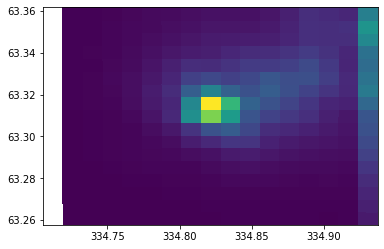

<ipython-input-119-a7b66e23e0e2>:8: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])


In [119]:
plt.figure()
plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])
plt.show()

dd_rep[5]=np.reshape(dd_rep5,np.shape(ra_cn[5]))

plt.figure()
plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])
plt.show()

<ipython-input-120-82642d2f82fe>:22: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im=ax.pcolor(ra_rep[i],dec_rep[i],np.array(dd_rep[i]),cmap='YlGnBu',\


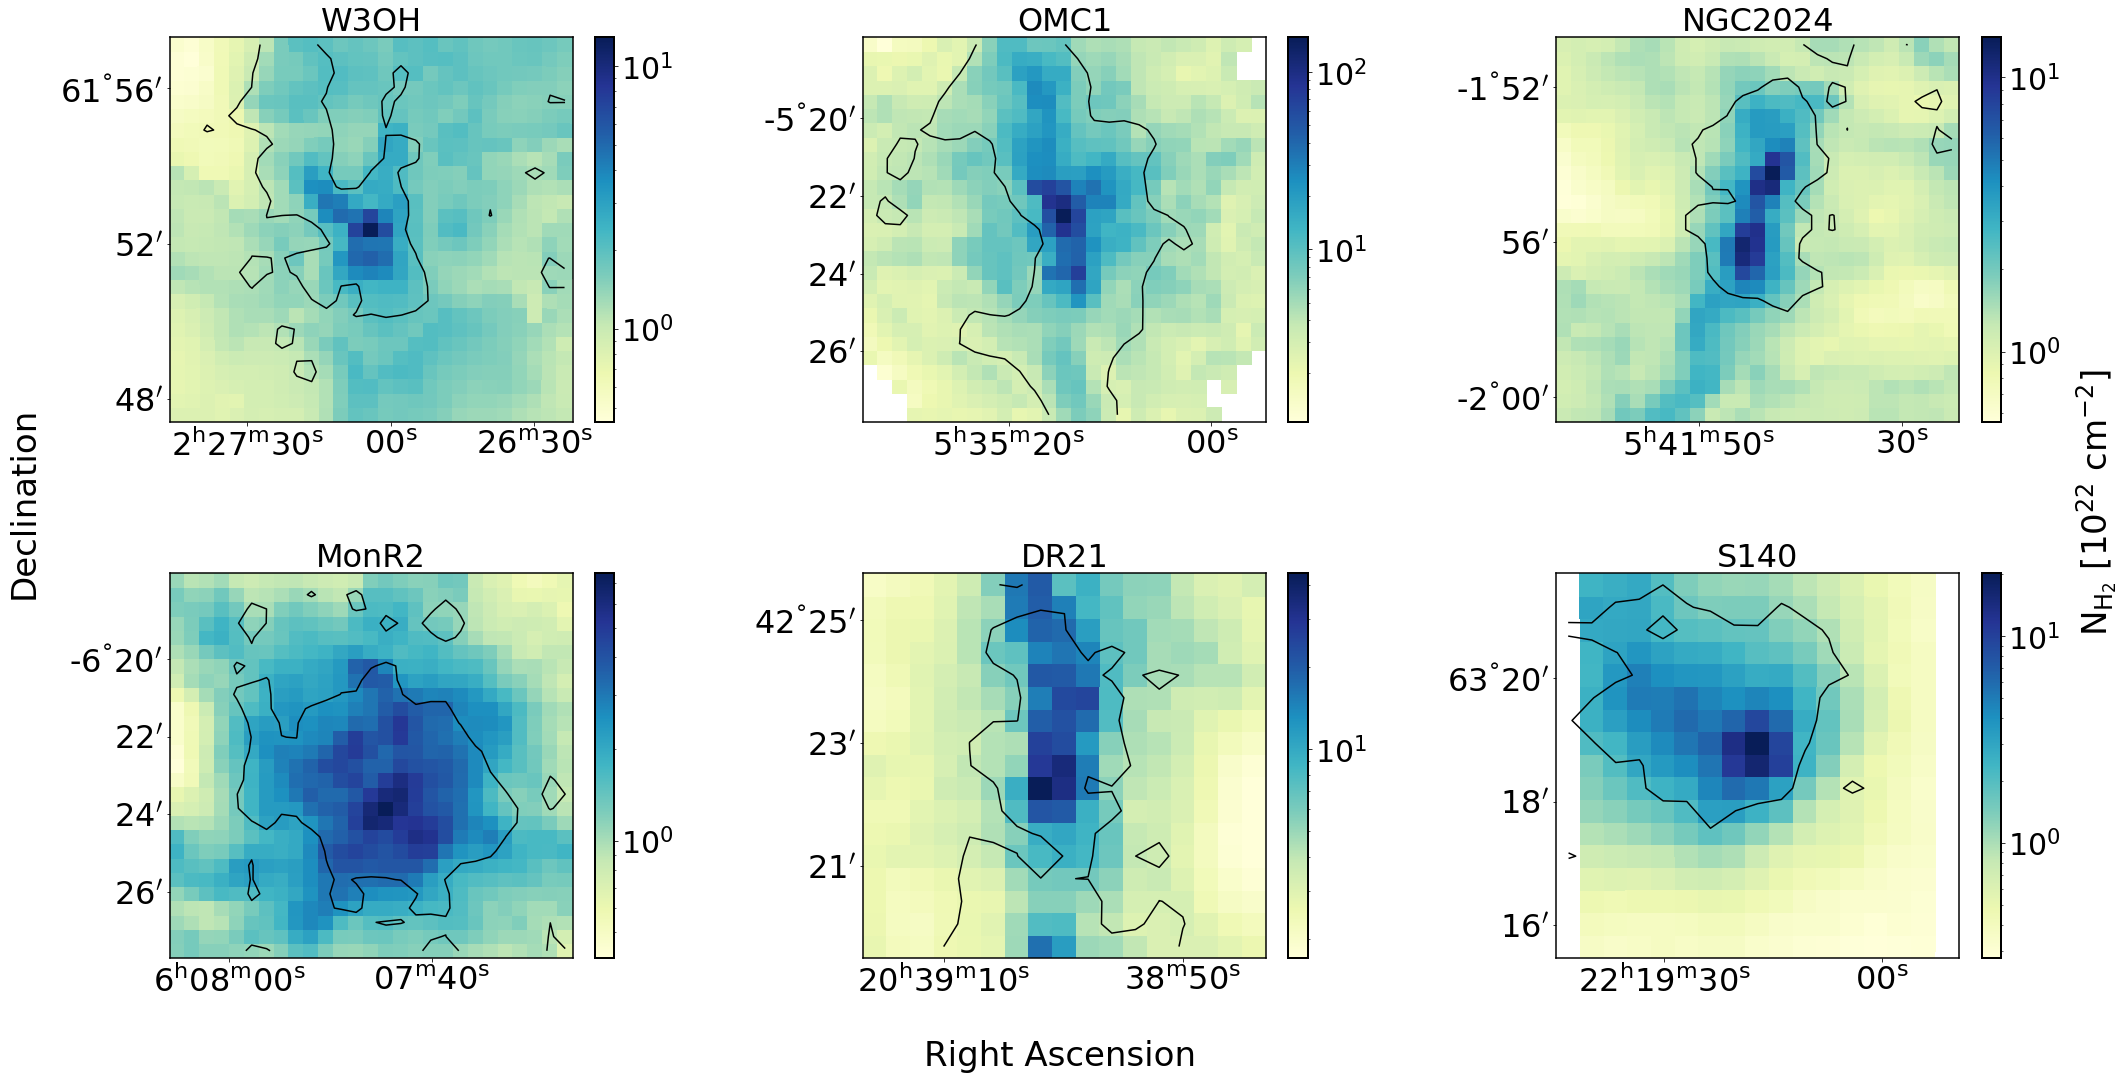

In [120]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.colors as colors

# dn=['W3OH','OMC1','NGC2024','MonR2','DR21','S140']
#mean_rms=[0.042859180612873374,0.07603604491496285,0.06089441350996692,0.04557302245667884,\
#0.0715149711218731,0.06022613695135612] # rms map

mean_rms=[0.13,0.27,0.31,0.14,0.31,0.16] # starlink

fig=plt.figure(figsize=(30,16))

for i in range(6):
    w=wcs.WCS(df2[i][0].header)
    ax=plt.subplot(2,3,i+1)

    #radi_dust=[0.5*max(dt_all[i]['dd'].flatten()[np.where(dt_all[i]['dd'].flatten()>0.)])]
    #radi_cn=[0.5*max(dt_cn_all[i]['dd'].flatten()[np.where(dt_cn_all[i]['dd'].flatten()>0.)])]

    #im=ax.pcolor(np.array(dd_rep2[i]),cmap='YlOrRd',\
    #             norm=colors.LogNorm(vmin=np.min(dd_rep2[i][np.where(~np.isnan(dd_rep2[i]))]), \
    #               vmax=np.max(dd_rep2[i][np.where(~np.isnan(dd_rep2[i]))])))#vmin=0,vmax=3)
    im=ax.pcolor(ra_rep[i],dec_rep[i],np.array(dd_rep[i]),cmap='YlGnBu',\
                 norm=colors.LogNorm(vmin=np.min(dd_rep[i][np.where(~np.isnan(dd_rep[i]))]), \
                   vmax=np.max(dd_rep[i][np.where(~np.isnan(dd_rep[i]))])))#vmin=0,vmax=3)
    #plt.gca().invert_xaxis()
    
    cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'N$_\mathrm{d}$ [g cm$^{-2}$]',fontsize=28)
    cb.ax.tick_params(labelsize=30)
    cb.dividers.set_linewidth(2)
    cb.outline.set_linewidth(2)
    ax.contour(ra_cn[i],dec_cn[i],np.array(df2[i][0].data),levels=[3*mean_rms[i]],colors='k')
    #ax.set_ylabel('Declination (J2000)',fontsize=28)
    #ax.set_xlabel('Right Ascension (J2000)',fontsize=28)
    #ax.tick_params(axis='both',labelsize=28)
    #plt.contour(dt_all[i]['ra'],dt_all[i]['dec'],dt_all[i]['dd'],radi_dust,colors='cyan')
    #plt.contour(ra_cn2[i][0],dec_cn2[i][0],np.array(mom0[i][0])/np.array(rms[i][0]),levels=[10,15,20,30],colors='k')
    #plt.contour(dt_cn_all[i]['ra'],dt_cn_all[i]['dec'],dt_cn_all[i]['dd'],radi_cn,colors='white')
    #plt.xlim(max(dt_cn_all[i]['ra'].flatten()),min(dt_cn_all[i]['ra'].flatten()))
    #plt.ylim(min(dt_cn_all[i]['dec'].flatten()),max(dt_cn_all[i]['dec'].flatten()))
    ax.set_yticks(yt[i])
    ax.set_yticklabels(yl[i],fontsize=32)
    ax.set_xticks(xt[i])
    ax.set_xticklabels(xl[i],fontsize=32)
    plt.title(dn[i],fontsize=32)
    plt.gca().invert_xaxis()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

#plt.tight_layout(pad=20)
plt.subplots_adjust(hspace=0.4,wspace=0.5)
fig.text(0.5, 0.02, 'Right Ascension', va='center', ha='center', fontsize=34)
fig.text(0.02, 0.5, 'Declination', va='center', ha='center', rotation='vertical', fontsize=34)
fig.text(0.98, 0.5, 'N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]', va='center', ha='center', rotation='vertical', fontsize=34)
fig.tight_layout(pad=8)
plt.savefig('H2_column_density.png')#,dpi=300,format='png')
plt.show()



In [121]:
print(61+56/60.,61+52/60.,61+48/60.)

61.93333333333333 61.86666666666667 61.8


<ipython-input-122-7db28de4b9ba>:9: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im=ax.pcolor(ra_cn[i],dec_cn[i],N_cn2[i]/10**14,cmap='YlOrRd',vmin=0)#vmin=0,vmax=3)


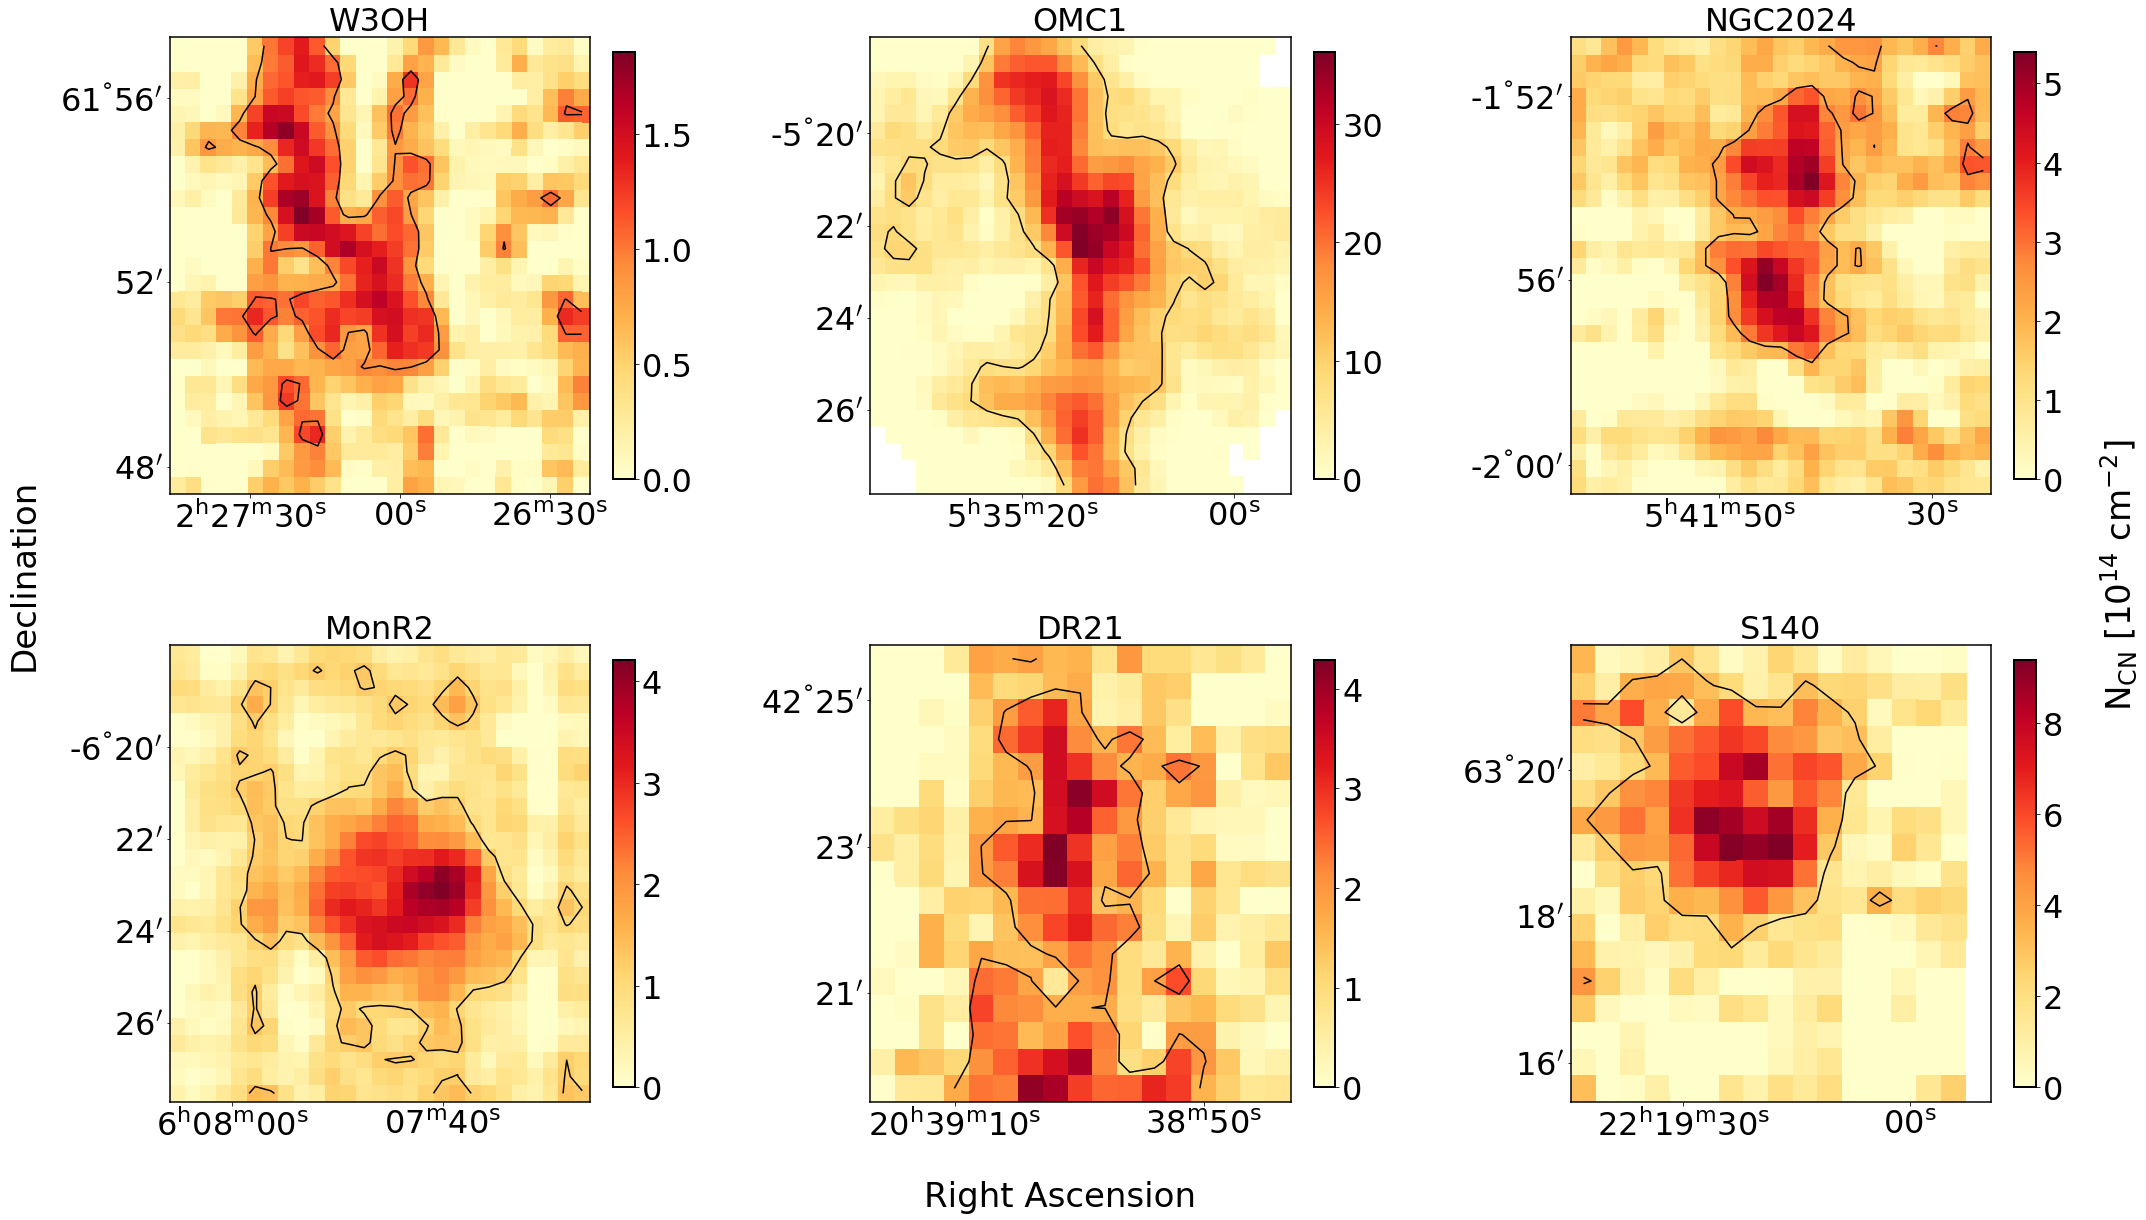

In [122]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

fig=plt.figure(figsize=(30,18))

for i in range(6):
    w=wcs.WCS(df2[i][0].header, naxis=2)
    ax=plt.subplot(2,3,i+1)

    im=ax.pcolor(ra_cn[i],dec_cn[i],N_cn2[i]/10**14,cmap='YlOrRd',vmin=0)#vmin=0,vmax=3)
    
    cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'N$_\mathrm{CN}$ [10$^{14}$ cm$^{-2}$]',fontsize=26)
    cb.ax.tick_params(labelsize=32)
    cb.dividers.set_linewidth(2)
    cb.outline.set_linewidth(2)
    
    ax.contour(ra_cn[i],dec_cn[i],np.array(df2[i][0].data),levels=[3*mean_rms[i]],colors='k')    
    #ax.contour(np.array(mom0[i][0])/mean_rms[i],levels=[3,6,9,12],colors='k')
    ax.set_yticks(yt[i])
    ax.set_yticklabels(yl[i],fontsize=32)
    ax.set_xticks(xt[i])
    ax.set_xticklabels(xl[i],fontsize=32)
    plt.title(dn[i],fontsize=32)
    plt.gca().invert_xaxis()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

plt.tight_layout(pad=20)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
fig.text(0.5, 0.02, 'Right Ascension', va='center', ha='center', fontsize=34)
fig.text(0.02, 0.5, 'Declination', va='center', ha='center', rotation='vertical', fontsize=34)
fig.text(0.99, 0.5, 'N$_\mathrm{CN}$ [10$^{14}$ cm$^{-2}$]', va='center', ha='center', rotation='vertical', fontsize=34)
fig.tight_layout(pad=8)

#fig.tight_layout()
plt.savefig('CN_column_density_Td.png')#,dpi=300,format='png')
plt.show()

## relation between column densities

In [123]:
df_hs500_rms=[0.00011568864854764259, 0.0009274966142390825, 0.0004559834725571987, \
              0.0003086326837022823, 0.002623799267892242, 0.0006138738890840803]
#dd_hs
mean_rms=[0.13, 0.27, 0.31, 0.14, 0.31, 0.16]
#dd_cn

In [124]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(32,20))

#xmax=[0.2,0.8,0.2,0.1,0.3,0.2]
#ymax=[1.2,3.7,2.6,2.0,2.7,2.0]

for i in range(6):    
    w=wcs.WCS(df2[i][0].header)
    ax=plt.subplot(2,3,i+1)
    #n=np.where(np.array(dd_rep[i].flatten())/df_hs500_rms[i]>3)
    nn=np.where(np.array(dd_cn[i].flatten())/mean_rms[i]>3)
    
    im=ax.scatter(np.log10(N_cn2[i].flatten()[nn]),np.log10(dd_rep[i].flatten()[nn]))#vmin=0,vmax=3)
    #cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'Intensity [MJy sr]',fontsize=24)
    #cb.ax.tick_params(labelsize=24)
    #ax.set_xlim(min(df_rep[i][0].data[n][nn].flatten()),min(df_rep[i][0].data[n][nn].flatten())+0.5)
    #X=df_rep[i][0].data[n][nn]*gaus_kernel
    #Y=mom0[i][0][n][nn]

    #X=X.reshape(len(X),1)
    #Y=Y.reshape(len(Y),1)


    #regr = linear_model.LinearRegression()
    # Train the model using the training sets
    #regr.fit(X, Y)
    
    #print("Model slope:    ", regr.coef_[0]) # y=ax+b ; a
    #print("Model intercept:", regr.intercept_) # y=ax+b ; b
# The mean squared error
    #print("Mean squared error: %.2f"\
    #  % mean_squared_error(X, Y))
    #print('Coefficients: \n', regr.coef_)
# Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % r2_score(X,Y))
    
    #ax.contour(np.array(df_rep[i][0].data)/df_hs500_rms[i],levels=[3,5,10],colors='k')
    #ax.set_ylabel('Declination',fontsize=24)
    #ax.set_xlabel('Right Ascension',fontsize=24)
    ax.tick_params(axis='both',labelsize=24)
    #ax.set_xlim(0,xmax[i])
    #ax.set_ylim(0,ymax[i])
    plt.title(dn[i],fontsize=24)
#plt.subplots_adjust(hspace=-0.1,wspace=0.6)
plt.savefig('CN_dust_col_relation.png',dpi=300,format='png')
plt.show()

In [125]:
np.log10(np.array(dd_rep[0].flatten()[nn])/10**22.)

array([-21.72392428, -22.13457541, -22.11298233, -21.68426167,
       -21.66470277, -21.70891114, -21.74813669, -21.77096391,
       -21.79039569, -21.85760294, -21.99397181, -21.99278176,
       -21.97832539, -21.9534452 , -21.87074774, -21.79207605,
       -21.76621352, -21.79517084, -21.81823768, -21.84927443,
       -21.89710331, -21.93217257, -22.01928136, -22.10582265,
       -22.07941994, -21.84415114, -21.86021935, -21.80051324,
       -21.7856501 , -21.73432573, -21.6992323 , -21.72892223,
       -21.76114727, -21.67956535, -21.69032413, -22.0939652 ,
       -22.06808029, -22.0153189 , -21.9723764 , -21.92593082,
       -21.9095172 , -21.91302723, -21.88290533, -21.95921038,
       -21.69040895, -21.72198238, -21.75425401, -21.79511071,
       -21.81293567, -21.82786922, -22.01279926, -21.87421682,
       -21.9195771 , -21.85266   , -21.87728951, -21.79663579,
       -21.76048582, -21.6963287 , -21.67507386, -21.66638817,
       -21.67341341, -21.70967172, -21.81759073, -21.90

In [126]:
print(dd_rep[5].flatten()[np.where(np.array(dd_cn[5].flatten())/mean_rms[5]>3)]/10**21.)

dd2=dd_rep[5].flatten()[np.where(np.array(dd_cn[5].flatten())/mean_rms[5]>3)]/10**21.
print(np.mean(dd2[np.where(~np.isnan(dd2))]))

[           nan 3.29214065e-21 3.32060690e-21 2.46808737e-21
 2.82957985e-21 4.47433685e-21 5.96686429e-21 5.26376183e-21
 3.22243548e-21 5.75595577e-22 3.53761280e-21 4.16825012e-21
 5.42118890e-21 1.10895416e-20 1.62058366e-20 1.01186169e-20
 2.35934766e-21 3.36794860e-21 4.25226187e-21 5.28245193e-21
 6.47543786e-21 1.34269366e-20 2.01554737e-20 9.45583141e-21
 2.37552282e-21 2.52630380e-21 3.27570888e-21 4.23079854e-21
 5.06854932e-21 6.04424769e-21 5.21945104e-21 6.36798978e-21
 9.19299861e-21 6.10490070e-21 2.73975142e-21 3.87936773e-21
 5.09027668e-21 4.94493212e-21 5.56514343e-21 4.57361269e-21
 4.01099436e-21 4.57034342e-21 4.07192947e-21 2.37284971e-21
 4.77536939e-21 4.06201420e-21 3.72813975e-21 3.69410238e-21
 3.20918734e-21 2.74564444e-21 2.80630034e-21 2.01504279e-21
 1.33931896e-21 3.75764555e-21 3.15108724e-21 2.80607310e-21
 2.70937779e-21 2.39467496e-21 1.96061923e-21 1.81362676e-21
 1.46091088e-21 1.07873349e-21            nan 2.87595045e-21
 2.90617982e-21 2.969793

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient 0.3296678908556739
Model slope:     [0.89198125]
Model intercept: [-0.6620245]
Mean squared error: 0.64
Coefficients: 
 [[0.89198125]]
Variance score: -110.09
Correlation Coefficient 0.7658232591497216
Model slope:     [1.55524418]
Model intercept: [-2.45615939]
Mean squared error: 1.56
Coefficients: 
 [[1.55524418]]
Variance score: -55.01
Correlation Coefficient 0.6573021581700008
Model slope:     [1.64468162]
Model intercept: [-2.05096702]
Mean squared error: 1.20
Coefficients: 
 [[1.64468162]]
Variance score: -103.98
Correlation Coefficient 0.6873386991899676
Model slope:     [0.84764935]
Model intercept: [-0.61813043]
Mean squared error: 0.68
Coefficients: 
 [[0.84764935]]
Variance score: -25.02
Correlation Coefficient 0.4028660998593501
Model slope:     [1.21834789]
Model intercept: [-0.81486785]
Mean squared error: 0.35
Coefficients: 
 [[1.21834789]]
Variance score: -29.01
Correlation Coefficient 0.6676428906422659
Model slope:     [1.25799741]
Model inter

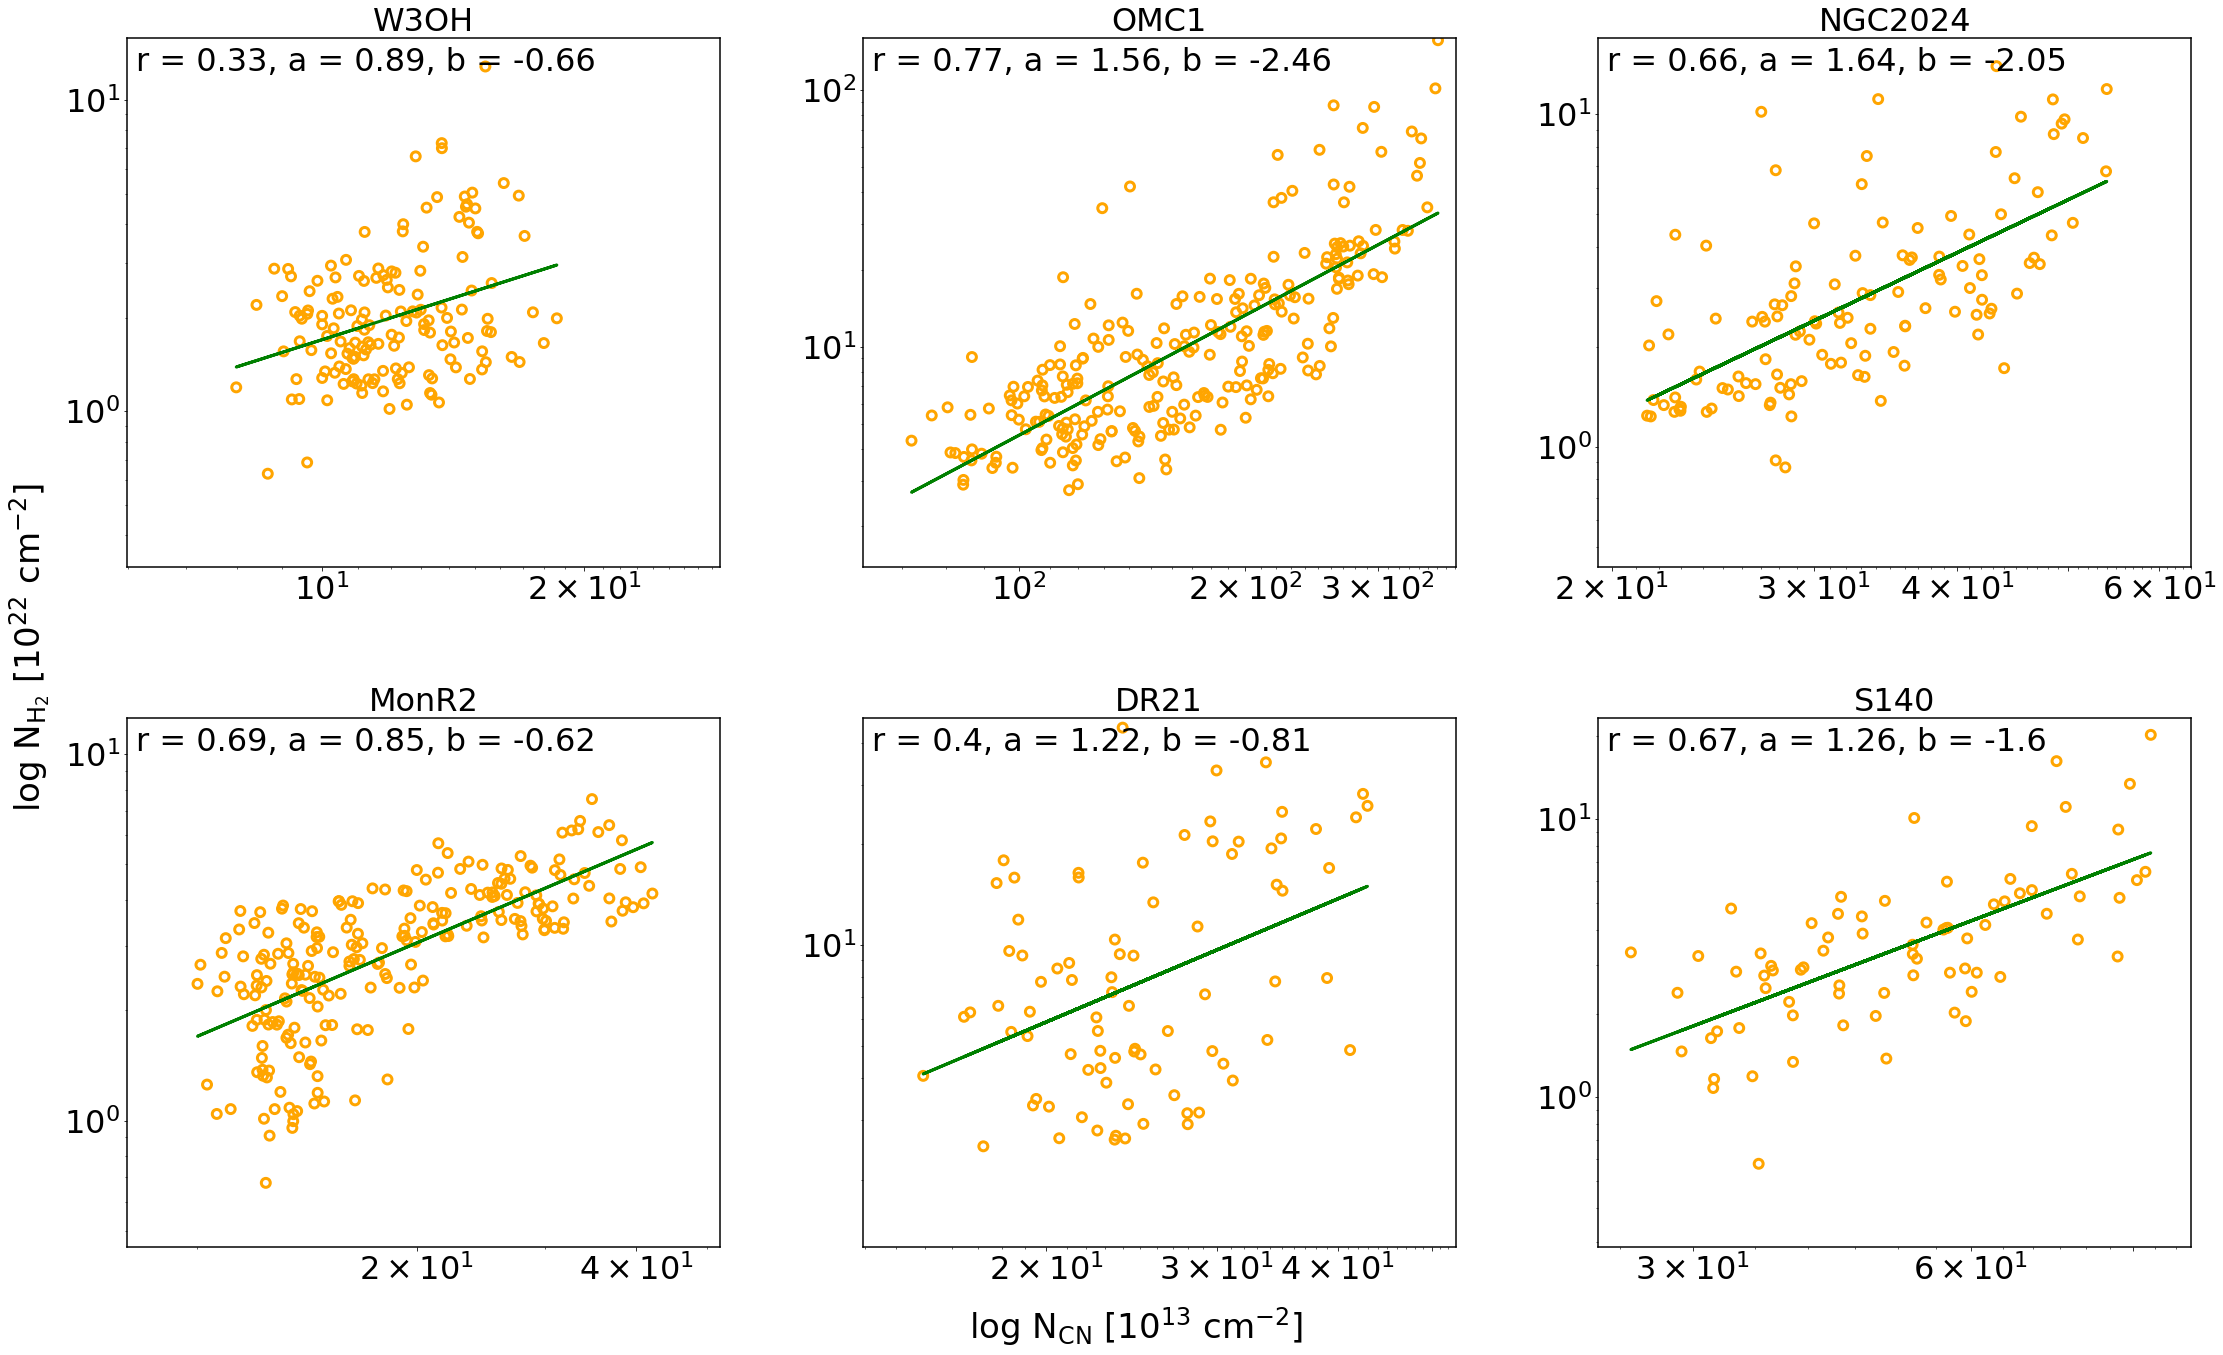

In [127]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import pearsonr

fig=plt.figure(figsize=(32,20))

#xmax=[0.2,0.8,0.2,0.1,0.3,0.2]
#ymax=[1.2,3.7,2.6,2.0,2.7,2.0]



for i in range(6):    
    w=wcs.WCS(df2[i][0].header)
    ax=plt.subplot(2,3,i+1)
   # n=np.where(np.array(dd_rep[i].flatten())/df_hs500_rms[i]>3)
    nn=np.where(np.array(dd_cn[i].flatten())/mean_rms[i]>3)
    
    im=ax.scatter(N_cn2[i].flatten()[nn]/10**13.,dd_rep[i].flatten()[nn],\
                 facecolors='None', edgecolors='orange',s=80,linewidth=3)#vmin=0,vmax=3)
    #cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'Intensity [MJy sr]',fontsize=24)
    #cb.ax.tick_params(labelsize=24)
    #ax.set_xlim(min(df_rep[i][0].data[n][nn].flatten()),min(df_rep[i][0].data[n][nn].flatten())+0.5)
    X1=np.log10(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)
    Y1=np.log10(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))

    #print(X1,Y1)
    X=X1.reshape(len(X1),1)
    Y=Y1.reshape(len(Y1),1)
    
    
    corr, _ = pearsonr(X1, Y1)
    print("Correlation Coefficient", corr)
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X, Y)
    
    print("Model slope:    ", regr.coef_[0]) # y=ax+b ; a
    print("Model intercept:", regr.intercept_) # y=ax+b ; b
# The mean squared error
    print("Mean squared error: %.2f"\
      % mean_squared_error(X, Y))
    print('Coefficients: \n', regr.coef_)
# Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(X,Y))
    
    ax.plot(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.,\
            10**(regr.coef_[0][0]*X1+regr.intercept_[0]),\
           color='green',linewidth=3)#,label=str(regr.coef_[0][0]))
    #ax.contour(np.array(df_rep[i][0].data)/df_hs500_rms[i],levels=[3,5,10],colors='k')
    #ax.set_ylabel('N(H$_2$) [10$^{22}$ cm$^{-2}$]',fontsize=24)
    #ax.set_xlabel('N(CN) [10$^{13}$ cm$^{-2}$]',fontsize=24)
    
    #ax.set_xlim(0,xmax[i])
    #ax.set_xlim(10**14,10**15)
    #plt.yscale("log")
    #plt.xscale("log")
    ax.semilogy()
    ax.semilogx()
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.tick_params(axis='both',labelsize=32)
    #plt.xticks(fontsize=23)
    if i==1 :#or i==4:
        
        ax.xaxis.set_major_locator(MultipleLocator(100))
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_minor_formatter(NullFormatter())
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        plt.xlim(np.min(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)-10.,\
             np.max(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)+20.)
        plt.ylim(np.min(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))/2.,\
            np.max(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))+3.)
    elif i==3:
        ax.xaxis.set_major_locator(MultipleLocator(20))
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_minor_formatter(NullFormatter())
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        plt.xlim(np.min(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)-2.,\
             np.max(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)+10)
        plt.ylim(np.min(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))/1.5,\
            np.max(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))+5.)
    elif i==5:
        ax.xaxis.set_major_locator(MultipleLocator(30))
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_minor_formatter(NullFormatter())
        ax.xaxis.set_minor_locator(MultipleLocator(5))
        plt.xlim(np.min(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)-2.,\
             np.max(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)+10)
        plt.ylim(np.min(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))/2.,\
            np.max(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))+3.)
    
    else:
        ax.xaxis.set_major_locator(MultipleLocator(10))
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_minor_formatter(NullFormatter())
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        plt.xlim(np.min(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)-2.,\
             np.max(np.array(N_cn2[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))])/10**13.)+10)
        plt.ylim(np.min(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))/2.,\
            np.max(np.array(dd_rep[i].flatten()[nn][np.where(~np.isnan(N_cn2[i].flatten()[nn])&~np.isnan(dd_rep[i].flatten()[nn]))]))+3.)
    plt.title(dn[i],fontsize=32)
    plt.legend(title='r = ' +str(np.round(corr,2))+', a = '\
               +str(np.round(regr.coef_[0][0],2))+', b = '\
               +str(np.round(regr.intercept_[0],2)) ,title_fontsize=32,\
              loc='upper left', frameon=False)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    
#fig.supxlabel('N(CN) [10$^{13}$ cm$^{-2}$]',fontsize=24)
#fig.supylabel('N(H$_2$) [10$^{22}$ cm$^{-2}$]',fontsize=24)

plt.subplots_adjust(hspace=-0.3,wspace=-0.3)
plt.tight_layout(pad=8)


fig.text(0.5, 0.02, 'log N$_\mathrm{CN}$ [10$^{13}$ cm$^{-2}$]', ha='center',fontsize=34)
fig.text(0.01, 0.5, 'log N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]', va='center', rotation='vertical',fontsize=34)

plt.savefig('CN_dust_col_log_relation_Td.png',dpi=300,format='png')
plt.show()

In [128]:
print(np.shape(ra_cn[0]),np.shape(ra_rep[0]))

(27, 27) (27, 27)


In [129]:
print(ra_cn[0][0],ra_rep[0][0])

[36.93516455 36.92223529 36.90930601 36.89637672 36.88344742 36.87051811
 36.85758878 36.84465945 36.83173011 36.81880076 36.80587141 36.79294205
 36.78001269 36.76708333 36.75415397 36.74122461 36.72829525 36.7153659
 36.70243655 36.68950721 36.67657788 36.66364855 36.65071924 36.63778994
 36.62486065 36.61193137 36.59900212] [36.93516455 36.92223529 36.90930601 36.89637672 36.88344742 36.87051811
 36.85758878 36.84465945 36.83173011 36.81880076 36.80587141 36.79294205
 36.78001269 36.76708333 36.75415397 36.74122461 36.72829525 36.7153659
 36.70243655 36.68950721 36.67657788 36.66364855 36.65071924 36.63778994
 36.62486065 36.61193137 36.59900212]


In [130]:
np.where(dd_rep[1].flatten()==max(dd_rep[1].flatten()))

(array([], dtype=int64),)

In [131]:
n=np.where(~np.isnan(dd_rep[1].flatten()))
nn=np.where(dd_rep[1].flatten()[n]==max(dd_rep[1].flatten()[n]))

#print(dd_rep[1].flatten()[n])

#print(n[0])

print(len(n[0]))
#print(dd_rep[1].flatten())

print(len(dd_rep[1].flatten()))

#print(n[0])
print(nn)

702
729
(array([369]),)


In [132]:
0.03/2.8/1.67/10**(-24)/10**22

0.6415739948674082

<ipython-input-133-748892cef91a>:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])


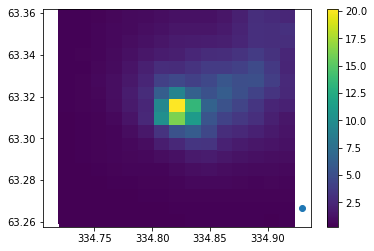

In [133]:
plt.figure()
plt.pcolor(ra_cn[5],dec_cn[5],dd_rep[5])
plt.colorbar()
plt.scatter(ra_cn[5][1][0],dec_cn[5][1][0])
#plt.contour(ra_cn[5],dec_cn[5],dd_rep[3],levels=[30*0.003/2.8/1.67/10**(-24)/10**22])
plt.show()

In [134]:
dd_rep5=[]

for j in range(len(dd_rep[5])):
    for i in range(len(dd_rep[5][j])):
        if i==0:   
            dd_rep5.append(np.nan)
        else:
            dd_rep5.append(dd_rep[5][j][i])
    

<ipython-input-135-c144b436e9ec>:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[5],dec_cn[5],np.reshape(dd_rep5,np.shape(ra_cn[5])))


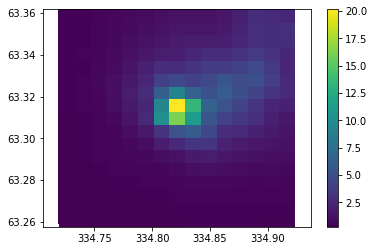

In [135]:
plt.figure()
plt.pcolor(ra_cn[5],dec_cn[5],np.reshape(dd_rep5,np.shape(ra_cn[5])))
plt.colorbar()
#plt.scatter(ra_cn[5][1][0],dec_cn[5][1][0])
#plt.contour(ra_cn[5],dec_cn[5],dd_rep[3],levels=[30*0.003/2.8/1.67/10**(-24)/10**22])
plt.show()

<ipython-input-136-11ba663e4fa4>:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_cn[0],dec_cn[0],dd_rep[0])


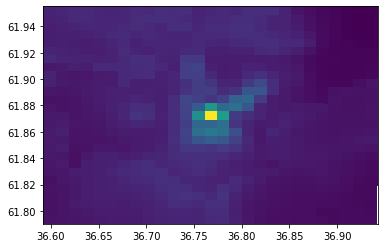

In [136]:
plt.figure()
plt.pcolor(ra_cn[0],dec_cn[0],dd_rep[0])

In [137]:
peak_dust_ra=[]
peak_dust_dec=[]
peak_cn_ra=[]
peak_cn_dec=[]
order=[]

for i in range(len(dn)):
    if i in [3,5]:
        n=np.where(N_cn2[i].flatten()[np.where(~np.isnan(N_cn2[i].flatten()))]==max(N_cn2[i].flatten()[np.where(~np.isnan(N_cn2[i].flatten()))]))
        peak_cn_ra.append([np.array(ra_cn[i]).flatten()[np.where(~np.isnan(N_cn2[i].flatten()))][n[0][0]]])
        peak_cn_dec.append([np.array(dec_cn[i]).flatten()[np.where(~np.isnan(N_cn2[i].flatten()))][n[0][0]]])
        n2=np.where(np.array(dd_rep[i]).flatten()[np.where(~np.isnan(dd_rep[i].flatten()))]\
                    ==max(np.array(dd_rep[i]).flatten()[np.where(~np.isnan(dd_rep[i].flatten()))]))
        peak_dust_ra.append([np.array(ra_rep[i]).flatten()[np.where(~np.isnan(dd_rep[i].flatten()))][n2[0][0]]])
        peak_dust_dec.append([np.array(dec_rep[i]).flatten()[np.where(~np.isnan(dd_rep[i].flatten()))][n2[0][0]]])
        order.append(i)
    elif i ==0:
        nsp=np.where((np.array(dec_cn[i]).flatten()<61.90)&(np.array(ra_cn[i]).flatten()<36.8))
        ns=np.where(dd_rep[i].flatten()[nsp]==max(dd_rep[i].flatten()[nsp]))
        #nn=np.where(df_rep[i][0].data.flatten()==max(df_rep[i][0].data.flatten()))
        peak_dust_ra.append([np.array(ra_rep[i]).flatten()[nsp][ns[0][0]]])
        peak_dust_dec.append([np.array(dec_rep[i]).flatten()[nsp][ns[0][0]]])
        ns2=np.where(np.array(N_cn2[i]).flatten()[nsp]==max(np.array(N_cn2[i]).flatten()[nsp]))
        #n2=np.where(np.array(mom0[i][0]).flatten()==max(np.array(mom0[i][0]).flatten()))
        peak_cn_ra.append([np.array(ra_cn[i]).flatten()[nsp][ns2[0]][0]])
        peak_cn_dec.append([np.array(dec_cn[i]).flatten()[nsp][ns2[0][0]]])
        order.append(i)        
    elif i ==1:
        nsp=np.where((np.array(dec_cn[i]).flatten()<-5.39))
        nnsp=np.where(~np.isnan(dd_rep[i].flatten()[nsp]))
        ns=np.where(dd_rep[i].flatten()[nsp][nnsp]==max(dd_rep[i].flatten()[nsp][nnsp]))
        n=np.where(~np.isnan(dd_rep[i].flatten()))
        nn=np.where(dd_rep[i].flatten()[n]==max(dd_rep[i].flatten()[n]))
        print(n[0])
        peak_dust_ra.append([np.array(ra_cn[i]).flatten()[n][nn[0][0]],np.array(ra_cn[i]).flatten()[nsp][nnsp][ns[0][0]]])
        peak_dust_dec.append([np.array(dec_cn[i]).flatten()[n][nn[0][0]],np.array(dec_cn[i]).flatten()[nsp][nnsp][ns[0][0]]])
        ns2=np.where(np.array(N_cn2[i]).flatten()[nsp][np.where(~np.isnan(np.array(N_cn2[i]).flatten()[nsp]))]\
                     ==max(np.array(N_cn2[i]).flatten()[nsp][np.where(~np.isnan(np.array(N_cn2[i]).flatten()[nsp]))]))
        n2=np.where(np.array(N_cn2[i]).flatten()[np.where(~np.isnan(np.array(N_cn2[i]).flatten()))]\
                    ==max(np.array(N_cn2[i]).flatten()[np.where(~np.isnan(np.array(N_cn2[i]).flatten()))]))
        peak_cn_ra.append([np.array(ra_cn[i]).flatten()[np.where(~np.isnan(np.array(N_cn2[i]).flatten()))][n2[0][0]],\
                           np.array(ra_cn[i]).flatten()[nsp][np.where(~np.isnan(np.array(N_cn2[i]).flatten()[nsp]))][ns2[0]][0]])
        peak_cn_dec.append([np.array(dec_cn[i]).flatten()[np.where(~np.isnan(np.array(N_cn2[i]).flatten()))][n2[0][0]],\
                            np.array(dec_cn[i]).flatten()[nsp][np.where(~np.isnan(np.array(N_cn2[i]).flatten()[nsp]))][ns2[0][0]]])
        order.append(i)
    elif i==2:
        nsp=np.where(np.array(dec_cn[i]).flatten()>-1.92)
        ns=np.where(dd_rep[i].flatten()[nsp]==max(dd_rep[i].flatten()[nsp]))
        #n=np.where(~np.isnan(dd_rep[i].flatten()))
        nsp2=np.where(np.array(dec_cn[i]).flatten()<-1.92)
        nn=np.where(dd_rep[i].flatten()[nsp2]==max(dd_rep[i].flatten()[nsp2]))
        peak_dust_ra.append([np.array(ra_cn[i]).flatten()[nsp2][nn[0][0]],np.array(ra_cn[i]).flatten()[nsp][ns[0][0]]])
        peak_dust_dec.append([np.array(dec_cn[i]).flatten()[nsp2][nn[0][0]],np.array(dec_cn[i]).flatten()[nsp][ns[0][0]]])
        ns2=np.where(np.array(N_cn2[i]).flatten()[nsp]==max(np.array(N_cn2[i]).flatten()[nsp]))
        n2=np.where(np.array(N_cn2[i]).flatten()==max(np.array(N_cn2[i]).flatten()))
        peak_cn_ra.append([np.array(ra_cn[i]).flatten()[n2[0][0]],np.array(ra_cn[i]).flatten()[nsp][ns2[0]][0]])
        peak_cn_dec.append([np.array(dec_cn[i]).flatten()[n2[0][0]],np.array(dec_cn[i]).flatten()[nsp][ns2[0][0]]])
        order.append(i)
    elif i==4:
        nsp=np.where(np.array(dec_cn[i]).flatten()>42.35)
        ns=np.where(dd_rep[i].flatten()[nsp]==max(dd_rep[i].flatten()[nsp]))
        peak_dust_ra.append([np.array(ra_cn[i]).flatten()[nsp][ns[0][0]]])
        peak_dust_dec.append([np.array(dec_cn[i]).flatten()[nsp][ns[0][0]]])
        ns2=np.where(np.array(N_cn2[i]).flatten()[nsp]==max(np.array(N_cn2[i]).flatten()[nsp]))
        n2=np.where(np.array(N_cn2[i]).flatten()==max(np.array(N_cn2[i]).flatten()))
        peak_cn_ra.append([np.array(ra_cn[i]).flatten()[nsp][ns2[0]][0]])
        peak_cn_dec.append([np.array(dec_cn[i]).flatten()[nsp][ns2[0][0]]])
        order.append(i)
    #elif i==4:
    #    nsp=np.where(np.array(ra_cn2[i][0]).flatten()>306.86) #left
    #    nrp=np.where((np.array(ra_cn2[i][0]).flatten()<306.86)&(np.array(dec_cn2[i][0]).flatten()>37.34))#right
    #    ns=np.where(df_rep[i][0].data.flatten()[nsp]==max(df_rep[i][0].data.flatten()[nsp]))
    #    nn=np.where(df_rep[i][0].data.flatten()[nrp]==max(df_rep[i][0].data.flatten()[nrp]))
    #    peak_dust_ra.append([np.array(ra_cn2[i][0]).flatten()[nrp][nn[0][0]],np.array(ra_cn2[i][0]).flatten()[nsp][ns[0][0]]])
    #    peak_dust_dec.append([np.array(dec_cn2[i][0]).flatten()[nrp][nn[0][0]],np.array(dec_cn2[i][0]).flatten()[nsp][ns[0][0]]])
    #    ns2=np.where(np.array(mom0[i][0]).flatten()[nsp]==max(np.array(mom0[i][0]).flatten()[nsp]))
    #    n2=np.where(np.array(mom0[i][0]).flatten()[nrp]==max(np.array(mom0[i][0]).flatten()[nrp]))
    #    peak_cn_ra.append([np.array(ra_cn2[i][0]).flatten()[nrp][n2[0][0]],np.array(ra_cn2[i][0]).flatten()[nsp][ns2[0]][0]])
    #    peak_cn_dec.append([np.array(dec_cn2[i][0]).flatten()[nrp][n2[0][0]],np.array(dec_cn2[i][0]).flatten()[nsp][ns2[0][0]]])
    #    order.append(i)
    else: 
        peak_dust_ra.append(np.nan)
        peak_dust_dec.append(np.nan)
        peak_cn_ra.append(np.nan)
        peak_cn_dec.append(np.nan)

[  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  78  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 26

In [138]:
print(peak_dust_ra)

[[36.76708333067714], [83.81041666541383, 83.80427831790769], [85.44028126028621, 85.42805218032265], [91.93551726082492], [309.75785505850826], [334.82125]]


In [139]:
df_rep=[[],[],[],[],[],[],[]]

for i in range(len(dn)):
    df_rep[i].append(fits.open(dn[i]+'_hs_reproject_to_trao.fits')[0])

In [140]:
print(N_cn2[i])

[[ 3.16668522e+14 -1.69490377e+14  2.08805417e+13  1.01945326e+14
  -1.29528588e+14 -3.17074383e+13  1.63831623e+14  8.47133347e+13
   1.90909393e+14  1.36593929e+14  2.05873127e+14 -3.30693194e+13
  -1.09313660e+14 -4.40758355e+13  1.52227288e+14  2.58167321e+14
              nan]
 [ 5.52108861e+13 -1.11205529e+14  9.39312263e+13 -7.72564178e+13
  -4.28231782e+13 -1.98546924e+14 -2.22033565e+14 -2.53152962e+14
   5.59279988e+13  1.04992531e+14  1.55095777e+14 -4.50249982e+13
  -1.97632627e+14 -2.46246995e+14 -1.28877130e+14 -1.99638091e+13
              nan]
 [-2.86747562e+14 -1.25520448e+14  7.27718901e+13 -2.05250611e+14
  -6.31958936e+13 -9.92291514e+13 -4.15632229e+13 -1.49667791e+14
   3.80503869e+13  9.97509145e+13  7.29922482e+13 -1.60136925e+14
  -1.23959038e+14 -1.21513599e+14 -2.30012854e+14 -1.53601131e+13
              nan]
 [ 2.87561030e+14  5.09070550e+13  4.43398849e+12 -5.45527922e+13
   3.98047067e+13  3.20621975e+13  2.00298154e+14  1.60669482e+14
   4.31735197e+13  

In [141]:
peak_dust_dec

[[61.87277777903065],
 [-5.374999998643738, -5.399444412150339],
 [-1.934166654516106, -1.9036110999974425],
 [-6.397499961968586],
 [42.37111081371469],
 [63.315833333436615]]

<ipython-input-142-5be38c65675e>:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='binary')#,\


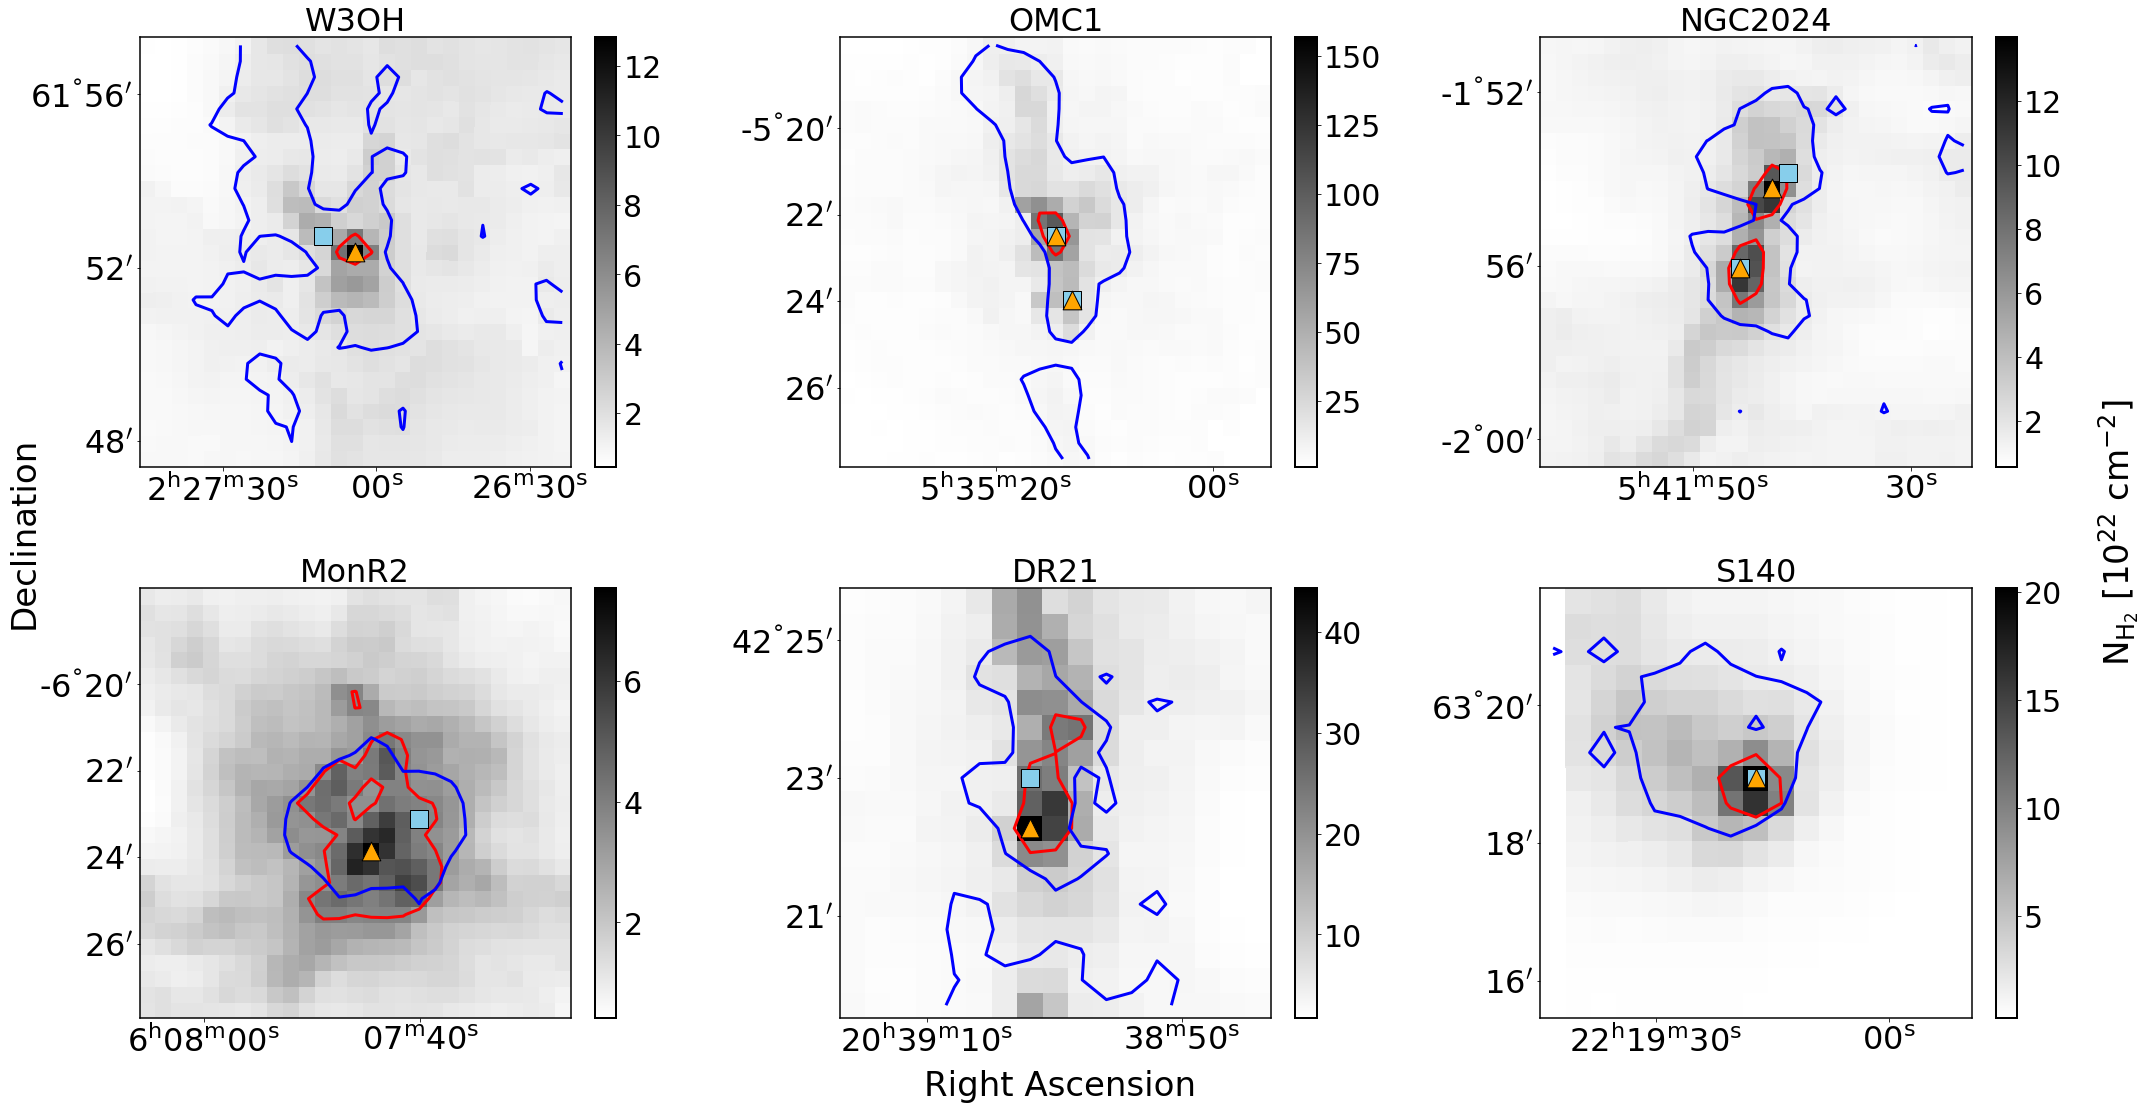

In [142]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig=plt.figure(figsize=(30,16))

#N_cn2[i]/10**14, np.array(dd_rep[i])

for i in range(6):
    w=wcs.WCS(df_rep[i][0].header)
    ax=plt.subplot(2,3,i+1)
    
    radi_cn=[0.5*max(N_cn2[i].flatten()[np.where(~np.isnan(N_cn2[i].flatten()))])]
    radi_dust=[0.5*max(np.array(dd_rep[i]).flatten()[np.where(~np.isnan(np.array(dd_rep[i].flatten())))])]
  
    im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='binary')#,\
                 #norm=colors.LogNorm(vmin=np.min(dd_rep[i][np.where(~np.isnan(dd_rep[i]))]), \
                 #  vmax=np.max(dd_rep[i][np.where(~np.isnan(dd_rep[i]))])))#vmin=0,vmax=3)
    
    cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'Intensity [Jy arcsec$^2$]',fontsize=24)
    cb.ax.tick_params(labelsize=30)
    cb.dividers.set_linewidth(2)
    cb.outline.set_linewidth(2)
    
    ax.scatter([peak_dust_ra[i]],[peak_dust_dec[i]],color='orange',edgecolor='k',s=350,marker='^',zorder=5,alpha=1)
    ax.scatter([peak_cn_ra[i]],[peak_cn_dec[i]],color='skyblue',edgecolor='k',s=350,marker='s',zorder=4,alpha=1)
    
    ax.contour(ra_cn[i],dec_cn[i],dd_rep[i],levels=radi_dust,colors='r',linewidths=3)
    ax.contour(ra_cn[i],dec_cn[i],np.array(N_cn2[i]),levels=radi_cn,colors='b',linewidths=3)
    #ax.set_ylabel('Declination',fontsize=24)
    #ax.set_xlabel('Right Ascension',fontsize=24)
    #ax.tick_params(axis='both',labelsize=24)
    #ax.xaxis.set_major_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #ax.xaxis.set_minor_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #plt.gca().invert_xaxis()
    ax.set_yticks(yt[i])
    ax.set_yticklabels(yl[i],fontsize=32)
    ax.set_xticks(xt[i])
    ax.set_xticklabels(xl[i],fontsize=32)
    plt.title(dn[i],fontsize=32)
    plt.gca().invert_xaxis()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

plt.subplots_adjust(hspace=0.4,wspace=0.5)
fig.text(0.5, 0.02, 'Right Ascension', va='center', ha='center', fontsize=34)
fig.text(0.02, 0.5, 'Declination', va='center', ha='center', rotation='vertical', fontsize=34)
fig.text(0.99, 0.5, 'N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]', va='center', ha='center', rotation='vertical', fontsize=34)
fig.tight_layout(pad=5)
plt.savefig('peak_positions_v2.png')#,dpi=300,format='png')
plt.show()

<ipython-input-143-1a813d7af6a8>:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='YlOrRd',\


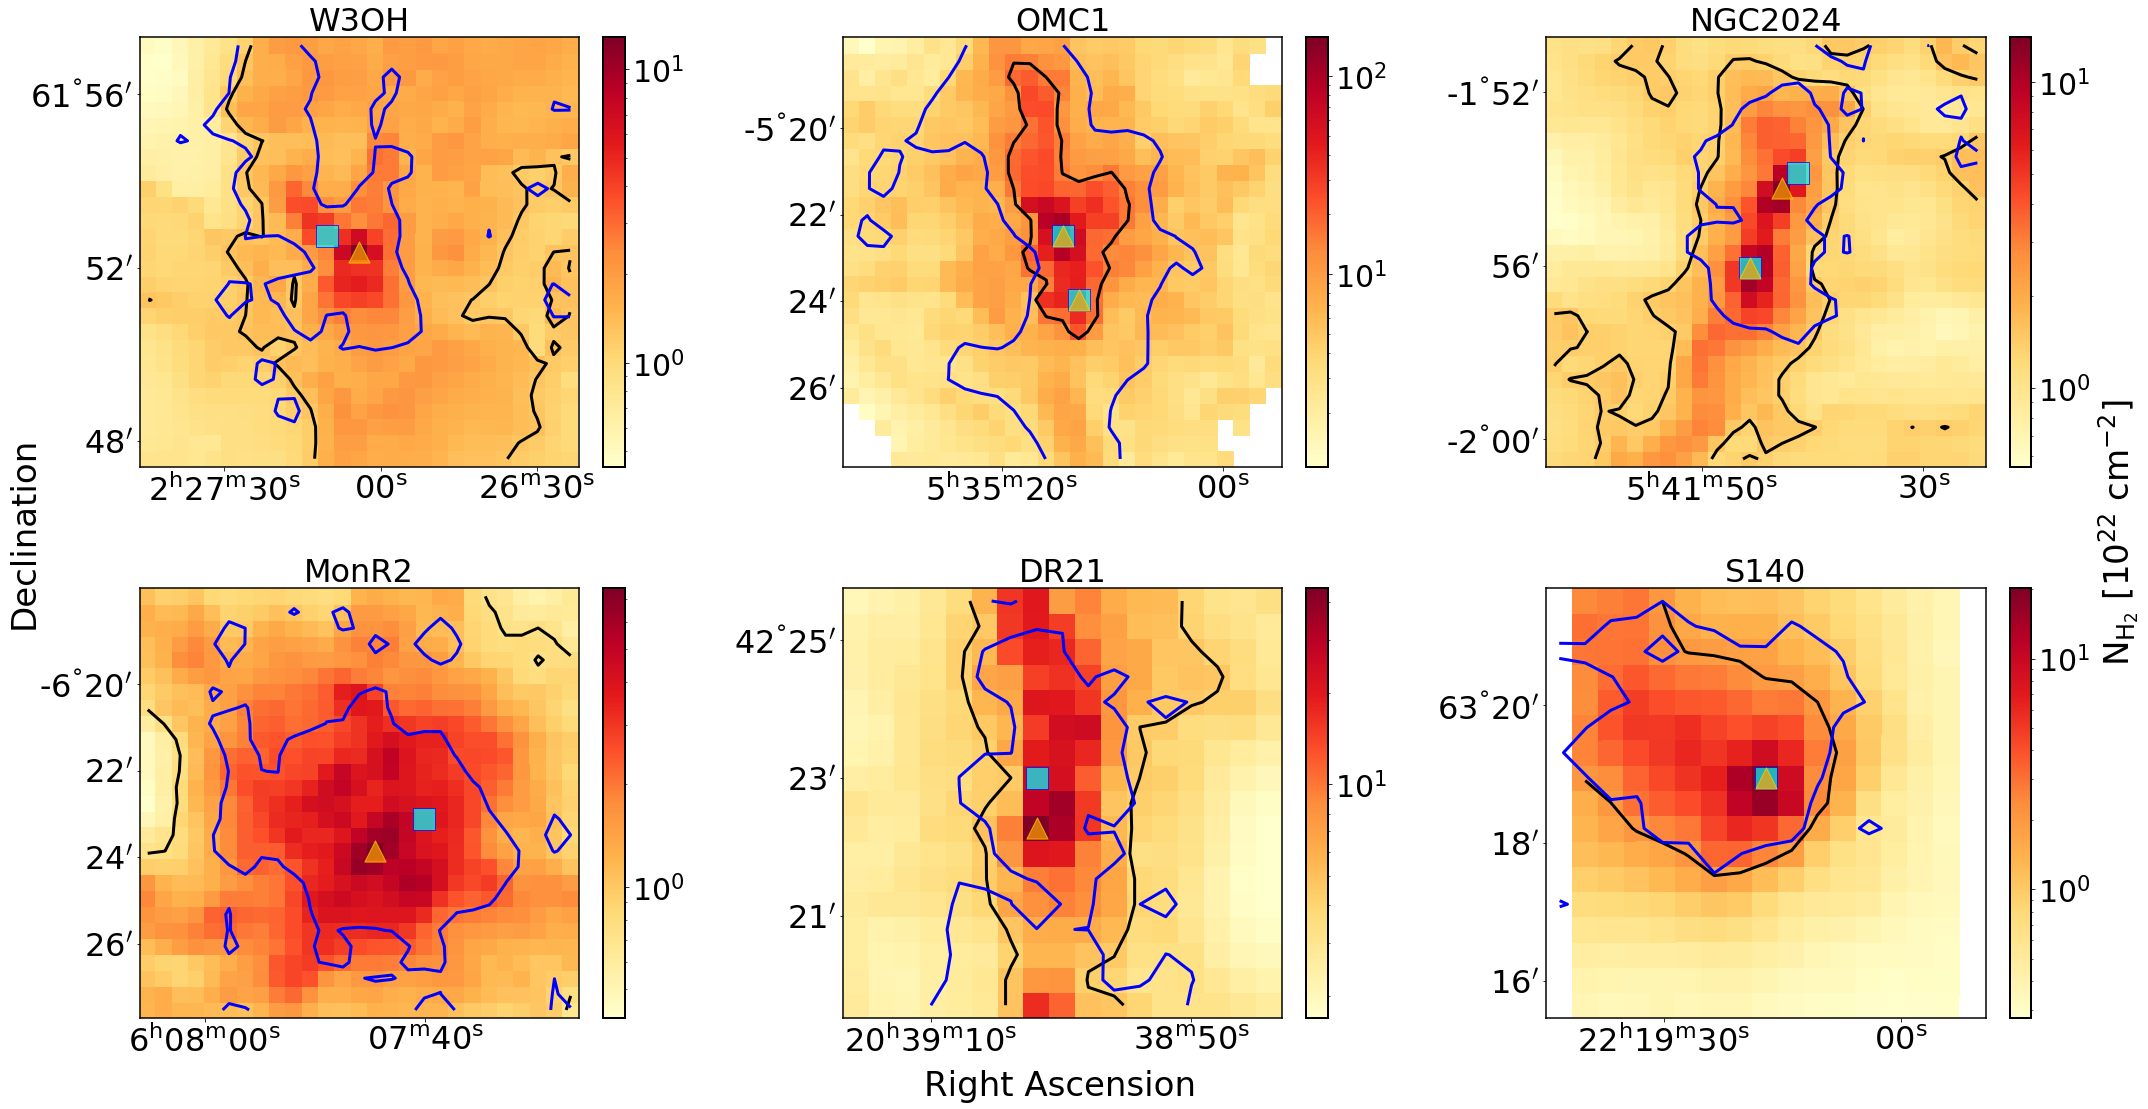

In [143]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig=plt.figure(figsize=(30,16))

#N_cn2[i]/10**14, np.array(dd_rep[i])

for i in range(6):
    w=wcs.WCS(df_rep[i][0].header)
    ax=plt.subplot(2,3,i+1)
    
    radi_cn=[3*mean_rms[i]]
    radi_dust=[0.1*max(np.array(dd_rep[i]).flatten()[np.where(~np.isnan(np.array(dd_rep[i].flatten())))])]
  
    im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='YlOrRd',\
                 norm=colors.LogNorm(vmin=np.min(dd_rep[i][np.where(~np.isnan(dd_rep[i]))]), \
                   vmax=np.max(dd_rep[i][np.where(~np.isnan(dd_rep[i]))])))#vmin=0,vmax=3)
    
    cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'Intensity [Jy arcsec$^2$]',fontsize=24)
    cb.ax.tick_params(labelsize=30)
    cb.dividers.set_linewidth(2)
    cb.outline.set_linewidth(2)
    
    ax.scatter([peak_dust_ra[i]],[peak_dust_dec[i]],color='orange',edgecolor='gold',s=450,marker='^',zorder=5,alpha=0.7)
    ax.scatter([peak_cn_ra[i]],[peak_cn_dec[i]],color='cyan',edgecolor='b',s=450,marker='s',zorder=4,alpha=0.7)
    
    ax.contour(ra_cn[i],dec_cn[i],dd_rep[i],levels=radi_dust,colors='k',linewidths=3)
    ax.contour(ra_cn[i],dec_cn[i],np.array(dd_cn[i]),levels=radi_cn,colors='b',linewidths=3)
    #ax.set_ylabel('Declination',fontsize=24)
    #ax.set_xlabel('Right Ascension',fontsize=24)
    #ax.tick_params(axis='both',labelsize=24)
    #ax.xaxis.set_major_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #ax.xaxis.set_minor_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #plt.gca().invert_xaxis()
    ax.set_yticks(yt[i])
    ax.set_yticklabels(yl[i],fontsize=32)
    ax.set_xticks(xt[i])
    ax.set_xticklabels(xl[i],fontsize=32)
    plt.title(dn[i],fontsize=32)
    plt.gca().invert_xaxis()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

plt.subplots_adjust(hspace=0.4,wspace=0.5)
fig.text(0.5, 0.02, 'Right Ascension', va='center', ha='center', fontsize=34)
fig.text(0.02, 0.5, 'Declination', va='center', ha='center', rotation='vertical', fontsize=34)
fig.text(0.99, 0.5, 'N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]', va='center', ha='center', rotation='vertical', fontsize=34)
fig.tight_layout(pad=5)
#plt.savefig('peak_positions.png')#,dpi=300,format='png')
plt.show()

In [144]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig=plt.figure(figsize=(30,16))

#N_cn2[i]/10**14, np.array(dd_rep[i])
mean_rms_dust=[0.08,0.2,0.05,0.03,0.14,0.03]
for i in range(6):
    w=wcs.WCS(df_rep[i][0].header)
    ax=plt.subplot(2,3,i+1)
    
    radi_cn=[3*mean_rms[i]]
    radi_dust=[3*mean_rms_dust[i]/2.8/1.67/10**(-24)/10**22]
  
    im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='YlOrRd',\
                 norm=colors.LogNorm(vmin=np.min(dd_rep[i][np.where(~np.isnan(dd_rep[i]))]), \
                   vmax=np.max(dd_rep[i][np.where(~np.isnan(dd_rep[i]))])))#vmin=0,vmax=3)
    
    cb=plt.colorbar(im,fraction=0.046)
    #cb.set_label(r'Intensity [Jy arcsec$^2$]',fontsize=24)
    cb.ax.tick_params(labelsize=30)
    cb.dividers.set_linewidth(2)
    cb.outline.set_linewidth(2)
    
    ax.scatter([peak_dust_ra[i]],[peak_dust_dec[i]],color='orange',edgecolor='gold',s=450,marker='^',zorder=5)
    ax.scatter([peak_cn_ra[i]],[peak_cn_dec[i]],color='cyan',edgecolor='b',s=450,marker='s',zorder=4)
    
    ax.contour(ra_cn[i],dec_cn[i],dd_rep[i],levels=[1,2,3,4,5],linewidths=3)#,colors='k',linewidths=3)
    ax.contour(ra_cn[i],dec_cn[i],np.array(dd_cn[i]),levels=radi_cn,colors='b',linewidths=3)
    #ax.set_ylabel('Declination',fontsize=24)
    #ax.set_xlabel('Right Ascension',fontsize=24)
    #ax.tick_params(axis='both',labelsize=24)
    #ax.xaxis.set_major_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #ax.xaxis.set_minor_locator(MultipleLocator(float(max(ra_cn2[i][0][0])-min(ra_cn2[i][0][0])/3)))
    #plt.gca().invert_xaxis()
    ax.set_yticks(yt[i])
    ax.set_yticklabels(yl[i],fontsize=32)
    ax.set_xticks(xt[i])
    ax.set_xticklabels(xl[i],fontsize=32)
    plt.title(dn[i],fontsize=32)
    plt.gca().invert_xaxis()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

plt.subplots_adjust(hspace=0.4,wspace=0.5)
fig.text(0.5, 0.02, 'Right Ascension', va='center', ha='center', fontsize=34)
fig.text(0.02, 0.5, 'Declination', va='center', ha='center', rotation='vertical', fontsize=34)
fig.text(0.99, 0.5, 'N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]', va='center', ha='center', rotation='vertical', fontsize=34)
fig.tight_layout(pad=5)
#plt.savefig('peak_positions.png')#,dpi=300,format='png')
plt.show()

<ipython-input-144-f59581072736>:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im=ax.pcolor(ra_cn[i],dec_cn[i],dd_rep[i],cmap='YlOrRd',\


In [145]:
cf=[] # convert factor from ra dif > deg. 
for i in range(len(dn)):
    ang=df_rep[i][0].header['CRVAL2']
    print(ang)
    cf.append(np.cos(np.deg2rad(ang)))

print(22/np.cos(np.deg2rad(63))*np.cos(np.deg2rad(63)))

61.87277777778
-5.381111111111
-1.928055555556
-6.379166666667
42.37722222222
63.30972222222
22.0


In [146]:
order=[]
len_twopeak=[]
for i in range(len(dn)):
    if len(peak_dust_ra[i])>1:
        for j in range(len(peak_dust_ra[i])):
            len_twopeak.append(np.sqrt(((np.array(peak_dust_ra[i][j])-np.array(peak_cn_ra[i][j]))*3600.*cf[i])**2\
                    +((np.array(peak_dust_dec[i][j])-np.array(peak_cn_dec[i][j]))*3600.)**2))
            order.append(i)
            #print((np.array(peak_dust_ra[i][j])-np.array(peak_cn_ra[i][j]))*3600.*cf[i])
            #print((np.array(peak_dust_ra[i][j])-np.array(peak_cn_ra[i][j]))*3600.)
    else:
        len_twopeak.append(np.sqrt(((np.array(peak_dust_ra[i][0])-np.array(peak_cn_ra[i][0]))*cf[i])**2\
                    +(np.array(peak_dust_dec[i][0])-np.array(peak_cn_dec[i][0]))**2)*3600.)
        order.append(i)
        #print((np.array(peak_dust_ra[i][0])-np.array(peak_cn_ra[i][0]))*3600.*cf[i])
        #print((np.array(peak_dust_ra[i][0])-np.array(peak_cn_ra[i][0]))*3600.)

#len_twopeak=np.sqrt(((np.array(peak_dust_ra)-np.array(peak_cn_ra))/cf)**2\
#                    +(np.array(peak_dust_dec)-np.array(peak_cn_dec))**2)*3600.

In [147]:
dist2=[2000, 388, 388, 358.3,358.3, 778, 1400, 906]

pcdist=np.array(len_twopeak)*np.pi*np.array(dist2)/3600./180.

yerr=[(0.    ,     0.   ,      0.      ,   0.00213318, 0.00301675, 0.01279923,\
 0.01810107, 0.00213363),\
      (0.    ,     0.   ,      0.     ,    0.00213318 ,0.00301675, 0.01279923,\
 0.01659265, 0.00213363)]

<ipython-input-148-acd2128c0f14>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


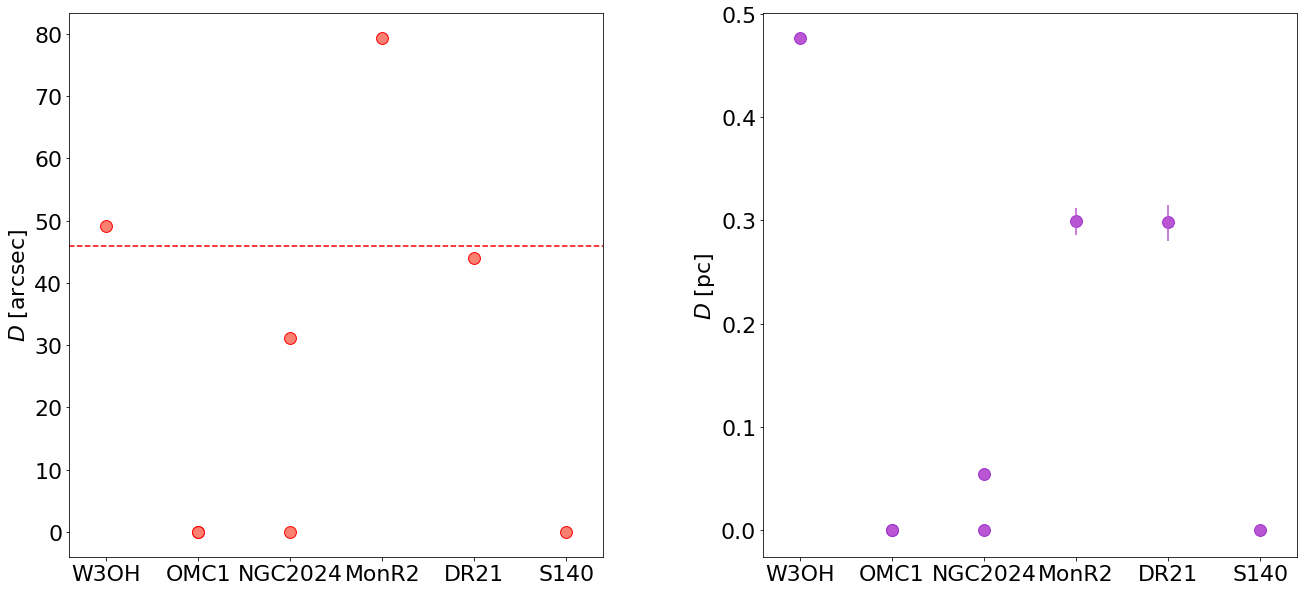

In [148]:
fig,ax = plt.subplots(figsize=(22,10))
plt.subplot(121)
plt.scatter(np.array(order)*5+5,len_twopeak,color='salmon',edgecolor='r',s=140)
#plt.errorbar(np.arange(1,21,3),len_twopeak, yerr[0:7], marker='o', mfc='red',
#         mec='salmon',fmt = '.',color='salmon', ms=12, mew=4)
#plt.xlabel('Sources',fontsize=22)
plt.axhline(y=46,color='r',linestyle='dashed')
plt.ylabel('$D$ [arcsec]',fontsize=22)
plt.xticks(np.arange(5,35,5),dn,fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(3,32)
#plt.ylim(-20,150)

plt.subplot(122)
plt.scatter(np.array(order)*5+5,pcdist,color='mediumorchid',edgecolor='darkorchid',s=140)
plt.errorbar(np.array(order)*5+5, pcdist, yerr=yerr,color='mediumorchid',linestyle='')
#plt.xlabel('Sources',fontsize=22)
plt.ylabel('$D$ [pc]',fontsize=22)
plt.xticks(np.arange(5,35,5),dn,fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(3,32)
#plt.xlim(min(radi_dust2)-5,max(radi_cn2)+5)
#plt.ylim(min(radi_dust2)-5, max(radi_cn2)+5)
plt.subplots_adjust(wspace=0.3)
#fig.tight_layout()
plt.savefig('peak_diff.png')#,dpi=300,format='png')
plt.show()

In [149]:
radi_dust2=[[],[],[],[],[],[]]
radi_cn2=[[],[],[],[],[],[]]

area_dust=[]
area_cn=[]

for i in range(6):
    n1=np.where(dd_rep[i].flatten()>1)
    n2=np.where(dd_rep[i].flatten()>2)
    n3=np.where(dd_rep[i].flatten()>3)
    n4=np.where(dd_rep[i].flatten()>4)
    n5=np.where(dd_rep[i].flatten()>5)
    radi_dust2[i].append(np.sqrt(len(dd_rep[i].flatten()[n1])*22.*22./np.pi))
    radi_dust2[i].append(np.sqrt(len(dd_rep[i].flatten()[n2])*22.*22./np.pi))
    radi_dust2[i].append(np.sqrt(len(dd_rep[i].flatten()[n3])*22.*22./np.pi))
    radi_dust2[i].append(np.sqrt(len(dd_rep[i].flatten()[n4])*22.*22./np.pi))
    radi_dust2[i].append(np.sqrt(len(dd_rep[i].flatten()[n5])*22.*22./np.pi))
    #area_dust.append(len(df_rep[i][0].data.flatten()[n])*22.*22.)
    n2=np.where(np.array(dd_cn[i]).flatten()>3*mean_rms[i])
    radi_cn2[i].append(np.sqrt(len(np.array(dd_cn[i]).flatten()[n2])*22.*22./np.pi))
    radi_cn2[i].append(np.sqrt(len(np.array(dd_cn[i]).flatten()[n2])*22.*22./np.pi))
    radi_cn2[i].append(np.sqrt(len(np.array(dd_cn[i]).flatten()[n2])*22.*22./np.pi))
    radi_cn2[i].append(np.sqrt(len(np.array(dd_cn[i]).flatten()[n2])*22.*22./np.pi))
    radi_cn2[i].append(np.sqrt(len(np.array(dd_cn[i]).flatten()[n2])*22.*22./np.pi))
    #area_cn.append(len(np.array(mom0[i][0]).flatten()[n2])*22.*22.)

In [150]:
plt.figure()
plt.scatter(radi_cn2[0],radi_dust2[0],c=cl,marker=mk[0])
plt.show()

NameError: name 'cl' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
co=[2,5,2,2,5,2]

for i in range(len(dd_rep)):
    n1=np.where(dd_rep[i].flatten()>1)
    print(co[i]/max(dd_rep[i].flatten()[n1]))
    


In [ ]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
plt.figure(figsize=(10,10))

mk=['o','^','s','*','P','D']
cl=['pink','hotpink','magenta','purple','blue']

for i in range(len(radi_dust2)):
    plt.scatter(radi_cn2[i],radi_dust2[i],c=cl,marker=mk[i],edgecolor='k',s=100)
        #plt.colorbar()

bounds=np.arange(1,6,1)
norm = BoundaryNorm(bounds, my_cm.N)

ticklabels=['1','2','3','4','5']
        
my_cm = ListedColormap(['pink','hotpink','magenta','purple','blue'])
im=plt.scatter(radi_cn2[0],radi_dust2[0],c=[1,2,3,4,5],edgecolor='k',vmin=1,vmax=5,cmap=my_cm,marker=mk[0],s=100)
cbar=plt.colorbar(im,boundaries=np.arange(0.5,6.5,1),ticks=bounds,norm=norm)
cbar.ax.set_yticklabels(ticklabels)
cbar.set_label(r'N$_{\mathrm{H}_2}$ [10$^{22}$ cm$^{-2}$]',fontsize=20)
cbar.ax.tick_params(labelsize=20)




for i in range(len(radi_dust2)):
    plt.scatter(radi_cn2[i][0],radi_dust2[i][0],facecolor='none',edgecolor='k',marker=mk[i],s=100,label=dn[i])

plt.plot(np.arange(0.,401,1),np.arange(0,401,1)\
        ,color='deepskyblue',linestyle='--')
plt.ylabel(r'R$_{eff,500} [arcsec]$',fontsize=18)
plt.xlabel(r'R$_{eff,CN} [arcsec]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
#plt.xlim(min(radi_dust2)-5,max(radi_cn2)+5)
#plt.ylim(min(radi_dust2)-5, max(radi_cn2)+5)
#plt.savefig('effradii_plot_75.png',dpi=300,format='png')
plt.show()

#print(np.array(radi_cn2)/np.array(radi_dust2))
#print(np.mean((np.array(radi_cn2)/np.array(radi_dust2))))

In [ ]:
for i in range(len(dn)):
    nn=np.where(np.array(dd_cn[i].flatten())/mean_rms[i]>3)
    print(np.mean(N_cn2[i].flatten()[nn])/10**13,np.std(N_cn2[i].flatten()[nn])/10**13)
    n=np.where(~np.isnan(dd_rep[i].flatten()[nn]))
    print(np.mean(dd_rep[i].flatten()[nn][n]))
    print(np.mean(dd_rep[i].flatten()[nn][n])*0.015)
    print(np.sqrt(np.mean(np.array(dd_drep[i].flatten()[nn][n])**2)))
    if i==5:
        print(np.sqrt(np.mean(np.array(dd_rep[i].flatten()[nn][n])**2)))
        print(np.mean(dd_rep[i].flatten()[nn][n]))

In [ ]:
mu2=2.8
mH=1.67*10**(-24) #g

for i in range(len(dn)):
    nn=np.where(np.array(dd_cn[i].flatten())/mean_rms[i]>3)
    n=np.where(~np.isnan(dd_rep[i].flatten()[nn]))
    print(np.mean(dd_rep[i].flatten()[nn][n])/mu2/mH/10**22)
    print(np.mean(dd_rep[i].flatten()[nn][n])*0.015/mu2/mH/10**22)


In [ ]:
for i in range(len(dn)):
    nn=np.where(np.array(dd_cn[i].flatten())/mean_rms[i]>3)
    #print(np.mean(N_cn2[i].flatten()[nn]),np.std(N_cn2[i].flatten()[nn]))
    n=np.where(~np.isnan(dd_rep[i].flatten()[nn]))
    print(np.mean(N_cn2[i].flatten()[nn])/(np.mean(dd_rep[i].flatten()[nn][n])/mu2/mH)/10**(-9))
    print(np.sqrt(0.015**2+(np.std(N_cn2[i].flatten()[nn])/np.mean(N_cn2[i].flatten()[nn]))**2)\
          *np.mean(N_cn2[i].flatten()[nn])/(np.mean(dd_rep[i].flatten()[nn][n])/mu2/mH)/10**(-9))

In [ ]:
1/(4*10**9), 1/(6*10**9)

In [ ]:
for i in range(len(dn)):
    nn=np.where((np.array(dd_cn[i].flatten())/mean_rms[i]>3)&(np.array(dd_cn[i].flatten())/mean_rms[i]<3.2))
    #print(np.mean(N_cn2[i].flatten()[nn]),np.std(N_cn2[i].flatten()[nn]))
    print(len(dd_rep[i].flatten()[nn]))
    n=np.where(~np.isnan(dd_rep[i].flatten()[nn]))
    print(np.mean(dd_rep[i].flatten()[nn][n])/mu2/mH/10**22)

In [ ]:
N_h2_350=[]
temp_350=[]

for i in range(len(ra_cn.flatten())):
    n=np.where((dt['ra']>dt_cn['ra'][i]-16./3600.)&(dt['ra']<dt_cn['ra'][i]+16./3600.)\
    &(dt['dec']>dt_cn['dec'][i]-16./3600.)  &(dt['dec']<dt_cn['dec'][i]+16./3600.))
    N_h2_350.append(np.mean(dt['NH2'][n]))
    temp_350.append(np.mean(dt['temp'][n]))

In [103]:
n=np.where((ra_cn>309.81)&(dec_cn<42.33))
n_dust=np.where((ra_500>309.81)&(ra_500<309.815)&(dec_500>42.32)&(dec_500<42.33))

print(dd_cn[n])
print(n)
print(np.mean(dd_cn[n]))

print(np.mean(dd_500[n_dust]))


TypeError: '>' not supported between instances of 'list' and 'float'

In [104]:
shape=(17,17)
sigma_cn=0.2
levels_cn=[3*sigma_cn,6*sigma_cn,9*sigma_cn,12*sigma_cn,15*sigma_cn,20*sigma_cn,30*sigma_cn]
sigma_dust=0.0055
levels_dust=[3*sigma_dust,6*sigma_dust,9*sigma_dust,12*sigma_dust,15*sigma_dust,20*sigma_dust,30*sigma_dust]


plt.figure(figsize=(10,10))
plt.pcolor(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_h2_350,shape))
plt.colorbar()
plt.contour(ra_500,dec_500,dd_500\
            ,levels_dust,colors='white')
plt.ylim(min(dt_cn['dec']),max(dt_cn['dec']))
plt.xlim(min(dt_cn['ra']),max(dt_cn['ra']))
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(10,10))
plt.pcolor(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(dt_cn['NH2'],shape))
plt.colorbar()
plt.contour(ra_cn,dec_cn,dd_cn\
            ,levels_cn,colors='white')
plt.contour(ra_500,dec_500,dd_500\
            ,levels_dust,colors='pink')
plt.ylim(min(dt_cn['dec']),max(dt_cn['dec']))
plt.xlim(min(dt_cn['ra']),max(dt_cn['ra']))
plt.gca().invert_xaxis()
plt.show()

TypeError: list indices must be integers or slices, not str

<Figure size 720x720 with 0 Axes>

In [105]:
N_cn_2=[]
N_n2_2=[]

for i in range(len(dd_cn.flatten())):
    N=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(0.36*(temp_350[i]+0.93)/gj)*np.exp(Eu/temp_350[i])*temp_350[i]/(temp_350[i]-2.7)*dd_cn.flatten()[i]*100000. ## Tex-2.7; background temp
    N_cn_2.append(N)
    N2=(3.*k/(8*(np.pi**3.)*nu00*s*(mu**2)*Ri))*(0.36*(temp_350[i]+0.93)/gj)*np.exp(Eu/temp_350[i])*temp_350[i]/(temp_350[i]-2.7)*dd_cn.flatten()[i]*100000./(4*10**(-9))
    N_n2_2.append(N2)

AttributeError: 'list' object has no attribute 'flatten'

In [106]:
N_n2_3=np.reshape(N_n2_2,shape)
print(np.mean(N_n2_3[n_bg]))
print(n)
print(N_n2_3[n])

sig_col_cn=1.930807237497939e+22
levels_col_cn=[3*sig_col_cn,6*sig_col_cn,9*sig_col_cn,12*sig_col_cn,15*sig_col_cn,20*sig_col_cn]

ValueError: cannot reshape array of size 0 into shape (17,17)

In [107]:
dt_total=Table([ra_cn.flatten(),dec_cn.flatten(),N_h2_350,temp_350,N_n2_2],names=['ra','dec','NH2_350','temp','NH2_cn'])

mask_3sig=np.where((dd_cn.flatten()>3*sigma_cn)&(dt_total['dec']>42.345))
mask_5sig=np.where((dd_cn.flatten()>5*sigma_cn)&(dt_total['dec']>42.345))

dt_3sig=dt_total[mask_3sig]

plt.figure()
plt.scatter(dt_total[mask_3sig]['ra'],dt_total[mask_3sig]['dec'])
plt.scatter(dt_total[mask_5sig]['ra'],dt_total[mask_5sig]['dec'],color='r')
plt.show()

AttributeError: 'list' object has no attribute 'flatten'

In [108]:
print(min(dt_total['NH2_350']))
print(min(dt_total['NH2_cn']))
print(max(dt_total['NH2_350']))
print(max(dt_total['NH2_cn']))


plt.figure()
plt.scatter(dt_3sig['ra'],dt_3sig['dec'],c=dt_3sig['NH2_cn']/dt_3sig['NH2_350'])
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.pcolor(np.reshape(dt_total['ra'],shape),np.reshape(dt_total['dec'],shape),np.reshape(dt_total['NH2_cn'],shape))
plt.colorbar()
plt.contour(ra_cn,dec_cn,dd_cn\
            ,levels_cn,colors='white')
plt.contour(ra_500,dec_500,dd_500\
            ,levels_dust,colors='pink')
plt.ylim(min(dt_cn['dec']),max(dt_cn['dec']))
plt.xlim(min(dt_cn['ra']),max(dt_cn['ra']))
plt.gca().invert_xaxis()
plt.show()


NameError: name 'dt_total' is not defined

In [109]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pcolor(ra_500,dec_500,dd_500)
#plt.contour(ra_500,dec_500,dd_500\
#            ,levels_dust,colors='pink')
plt.colorbar()
plt.contour(ra_cn,dec_cn,dd_cn,levels_cn,colors='white')
plt.xlim(max(ra_cn.flatten()),min(ra_cn.flatten()))
plt.ylim(min(dec_cn.flatten()),max(dec_cn.flatten()))
plt.title('color:500micron, contour:cn integrated intensity')

plt.subplot(1,2,2)
plt.pcolor(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_h2_350,shape))
plt.colorbar()
plt.contour(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_n2_2,shape),\
           levels_col_cn,colors='cyan')
#plt.legend()
plt.title('color:column density from dust ,contour:column density from cn')
plt.ylim(min(dt_cn['dec']),max(dt_cn['dec']))
plt.xlim(min(dt_cn['ra']),max(dt_cn['ra']))
plt.gca().invert_xaxis()
plt.show()

<ipython-input-109-ee56112178e4>:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ra_500,dec_500,dd_500)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

In [110]:
#print(dt_total['NH2_cn'][mask_3sig])
#print(dt_total['NH2_350'][mask_3sig])

NH2_350_2=[]
for i in range(len(dt_total['NH2_350'])):
    if dt_total['NH2_350'][i] >0.:
        NH2_350_2.append(dt_total['NH2_350'][i])
        

NH2_cn_2=[]
for i in range(len(dt_total['NH2_cn'])):
    if dt_total['NH2_cn'][i] >0.:
        NH2_cn_2.append(dt_total['NH2_cn'][i])
        
print(min(NH2_350_2),max(NH2_350_2),min(NH2_cn_2),max(NH2_cn_2))

NameError: name 'dt_total' is not defined

In [111]:
dt_3sig=dt_total[mask_3sig]

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(dt_total[mask_5sig]['NH2_350'],dt_total[mask_5sig]['NH2_cn'],c='orange')
plt.plot(np.arange(min(NH2_350_2),max(NH2_cn_2),1e+21),\
         np.arange(min(NH2_350_2),max(NH2_cn_2),1e+21),c='tomato')
#plt.title('DR21')
plt.xlabel(r'Dust N(H$_2$)[cm$^{-2}$]',**axis_font)
plt.ylabel(r'CN N(H$_2$)[cm$^{-2}$]',**axis_font)
plt.xlim(2e+22,1e+23)
#plt.ylim(1.2419804366687791e+22,6.190788223592183e+23)
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.semilogx()
plt.semilogy()


plt.subplot(122)
plt.scatter(dt_3sig['NH2_350'],dt_3sig['NH2_cn'],c='orange')
plt.plot(np.arange(min(NH2_350_2),max(NH2_cn_2),1e+21),\
         np.arange(min(NH2_350_2),max(NH2_cn_2),1e+21),c='tomato')
#plt.title('DR21')
plt.xlabel(r'Dust N(H$_2$)[cm$^{-2}$]',**axis_font)
plt.ylabel(r'CN N(H$_2$)[cm$^{-2}$]',**axis_font)
#plt.xlim(1.2419804366687791e+22,6.190788223592183e+23)
#plt.ylim(1.2419804366687791e+22,6.190788223592183e+23)
plt.xticks(**axis_font)
plt.yticks(**axis_font)
#plt.xlim(2e+22,1e+23)
plt.semilogx()
plt.semilogy()
plt.show()

NameError: name 'dt_total' is not defined

In [112]:
dt_3sig=Table([dt_total[mask_3sig]['NH2_350'],dt_total[mask_3sig]['NH2_cn']],names=['NH2_dust','NH2_cn'])
dt_5sig=Table([dt_total[mask_5sig]['NH2_350'],dt_total[mask_5sig]['NH2_cn']],names=['NH2_dust','NH2_cn'])
ascii.write(dt_3sig,'3sig.dat')
ascii.write(dt_5sig,'5sig.dat')

NameError: name 'dt_total' is not defined

In [113]:
print(dt_total)

NameError: name 'dt_total' is not defined

In [114]:
radi_dust=[0.5*max(dd_500.flatten())]
radi_cn=[0.5*max(dd_cn.flatten())]
radi_col_dust=[0.5*max(N_h2_350)]
radi_col_cn=[0.5*max(N_n2_2)]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pcolor(ra_500,dec_500,dd_500)
plt.colorbar()
plt.contour(ra_500,dec_500,dd_500\
            ,radi_dust,colors='cyan')

plt.contour(ra_cn,dec_cn,dd_cn,radi_cn,colors='white')
plt.xlim(max(ra_cn.flatten()),min(ra_cn.flatten()))
plt.ylim(min(dec_cn.flatten()),max(dec_cn.flatten()))
#plt.title('color:500micron, contour:cn integrated intensity')


plt.subplot(1,2,2)
plt.pcolor(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_h2_350,shape))
plt.colorbar()
plt.contour(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_n2_2,shape),\
           radi_col_cn,colors='cyan')

plt.contour(np.reshape(dt_cn['ra'],shape),np.reshape(dt_cn['dec'],shape),np.reshape(N_h2_350,shape),radi_col_dust,\
           colors='white')
#plt.legend()
#plt.title('color:column density from dust ,contour:column density from cn')
plt.ylim(min(dt_cn['dec']),max(dt_cn['dec']))
plt.xlim(min(dt_cn['ra']),max(dt_cn['ra']))
plt.gca().invert_xaxis()
plt.show()

AttributeError: 'list' object has no attribute 'flatten'

In [115]:
n_radi_dust=np.where((dt_cn['dec']>42.35)&(N_h2_350>0.5*max(N_h2_350))&(dt_cn['dec']<42.41))
n_radi_cn=np.where((dt_cn['dec']>42.35)&(N_n2_2>0.5*max(N_n2_2)))
print(np.sqrt(len(n_radi_dust[0]))*22.*3.) #kpc
print(np.sqrt(len(n_radi_cn[0]))*22.*3.) #kpc

print(np.sqrt(len(n_radi_dust[0]))*22.) #arcsec
print(np.sqrt(len(n_radi_cn[0]))*22.) #arcsec

TypeError: list indices must be integers or slices, not str

In [116]:
print(N_h2_350[n_radi[0][0]])

NameError: name 'N_h2_350' is not defined